In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from sklearn.datasets import make_blobs, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVC
import matplotlib.colors as mcolors
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import seaborn as sns



Grafico 'vector_example.pdf' generato.


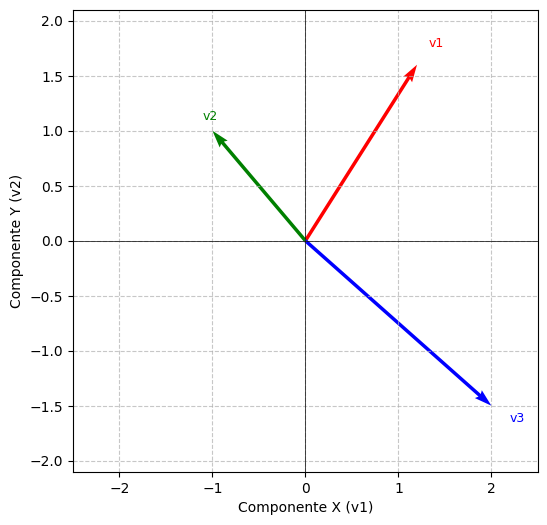

In [3]:

plt.figure(figsize=(6, 6))

vectors = {
    "v1 (1.2, 1.6)": (1.2, 1.6),
    "v2 (-1, 1)": (-1, 1),
    "v3 (2, -1.5)": (2, -1.5) 
}


origin_x = [0] * len(vectors)
origin_y = [0] * len(vectors)


vector_x_components = [v[0] for v in vectors.values()]
vector_y_components = [v[1] for v in vectors.values()]


colors = ['r', 'g', 'b']
for i, label in enumerate(vectors.keys()):
    plt.quiver(origin_x[i], origin_y[i], 
               vector_x_components[i], vector_y_components[i], 
               angles='xy', scale_units='xy', scale=1, color=colors[i],
               label=label)
    plt.text(vector_x_components[i]*1.1, vector_y_components[i]*1.1, label.split(" ")[0], 
             color=colors[i], fontsize=9)

max_val_x = max(abs(v[0]) for v in vectors.values()) + 0.5
max_val_y = max(abs(v[1]) for v in vectors.values()) + 0.5
plt.xlim(-max_val_x, max_val_x)
plt.ylim(-max_val_y, max_val_y)

plt.xlabel("Componente X (v1)")
plt.ylabel("Componente Y (v2)")


plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.savefig("vector_example.pdf", format='pdf', bbox_inches='tight')


print("Grafico 'vector_example.pdf' generato.")

Grafico 'vector_operations_example.pdf' generato.


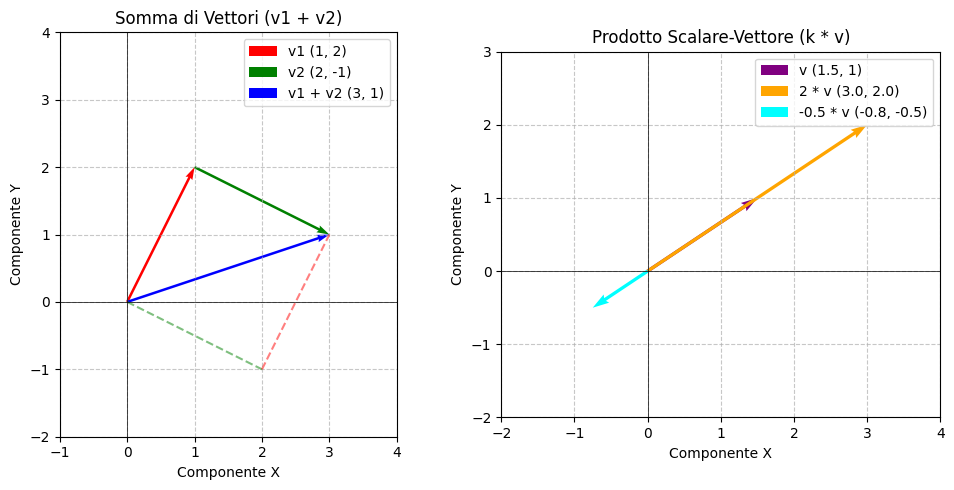

In [4]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
v1 = np.array([1, 2])
v2 = np.array([2, -1])
v_sum = v1 + v2

# Disegnare v1
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1 (1, 2)')
# Disegnare v2 partendo dalla punta di v1 (per la regola del parallelogramma/triangolo)
plt.quiver(v1[0], v1[1], v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='v2 (2, -1)')
# Disegnare la somma v_sum
plt.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1 + v2 ({}, {})'.format(v_sum[0], v_sum[1]))

# Linee tratteggiate per completare il parallelogramma (opzionale)
plt.plot([0, v2[0]], [0, v2[1]], linestyle='--', color='g', alpha=0.5) # v2 dall'origine
plt.plot([v2[0], v_sum[0]], [v2[1], v_sum[1]], linestyle='--', color='r', alpha=0.5) # v1 dalla punta di v2

plt.xlim(-1, 4)
plt.ylim(-2, 4)
plt.xlabel("Componente X")
plt.ylabel("Componente Y")
plt.title("Somma di Vettori (v1 + v2)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(1, 2, 2)
v = np.array([1.5, 1])
scalar = 2
v_scaled_pos = scalar * v
v_scaled_neg = -0.5 * v


plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='purple', label='v (1.5, 1)')
plt.quiver(0, 0, v_scaled_pos[0], v_scaled_pos[1], angles='xy', scale_units='xy', scale=1, color='orange', 
           label='{} * v ({}, {})'.format(scalar, v_scaled_pos[0], v_scaled_pos[1]))

plt.quiver(0, 0, v_scaled_neg[0], v_scaled_neg[1], angles='xy', scale_units='xy', scale=1, color='cyan', 
           label='{} * v ({:.1f}, {:.1f})'.format(-0.5, v_scaled_neg[0], v_scaled_neg[1]))


plt.xlim(-2, 4)
plt.ylim(-2, 3)
plt.xlabel("Componente X")
plt.ylabel("Componente Y")
plt.title("Prodotto Scalare-Vettore (k * v)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig("vector_operations_example.pdf", format='pdf', bbox_inches='tight')


print("Grafico 'vector_operations_example.pdf' generato.")

Grafico 'electricity_consumption_scatter.pdf' generato.


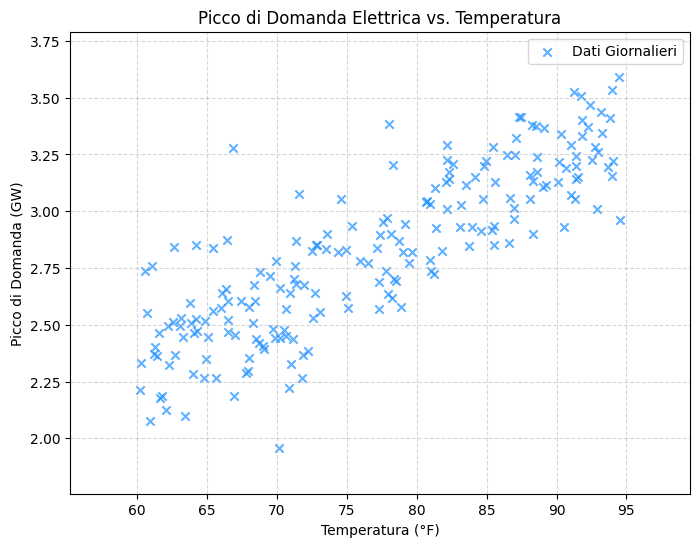

In [5]:



np.random.seed(42) 


temperatures_F = np.random.uniform(60, 95, 200) 

base_demand = 0.5 
slope = 0.03    
noise_std_dev = 0.2 

peak_demand_GW = base_demand + slope * temperatures_F + np.random.normal(0, noise_std_dev, temperatures_F.shape[0])
peak_demand_GW = np.maximum(peak_demand_GW, 0.1)


plt.figure(figsize=(8, 6))
plt.scatter(temperatures_F, peak_demand_GW, marker='x', color='dodgerblue', alpha=0.7, label='Dati Giornalieri')

plt.xlabel("Temperatura (°F)")
plt.ylabel("Picco di Domanda (GW)")
plt.title("Picco di Domanda Elettrica vs. Temperatura")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(min(temperatures_F) - 5, max(temperatures_F) + 5)
plt.ylim(min(peak_demand_GW) - 0.2, max(peak_demand_GW) + 0.2)

plt.savefig("electricity_consumption_scatter.pdf", format='pdf', bbox_inches='tight')

print("Grafico 'electricity_consumption_scatter.pdf' generato.")

Retta di regressione calcolata: y = 0.0296 * x + 0.5478
Grafico 'electricity_scatter_with_line.pdf' generato.


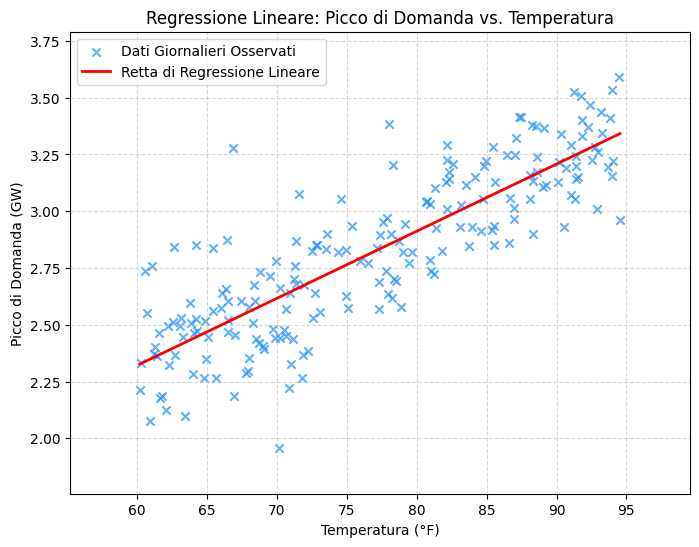

In [6]:

X = temperatures_F.reshape(-1, 1)
y = peak_demand_GW

model = LinearRegression()
model.fit(X, y)

alpha = model.coef_[0]  
beta = model.intercept_ 
print(f"Retta di regressione calcolata: y = {alpha:.4f} * x + {beta:.4f}")


temperatures_for_line = np.array([[min(temperatures_F)], [max(temperatures_F)]]) 
predicted_demand_for_line = model.predict(temperatures_for_line)

plt.figure(figsize=(8, 6))

plt.scatter(temperatures_F, peak_demand_GW, marker='x', color='dodgerblue', alpha=0.7, label='Dati Giornalieri Osservati')


plt.plot(temperatures_for_line, predicted_demand_for_line, color='red', linewidth=2, label='Retta di Regressione Lineare')


plt.xlabel("Temperatura (°F)")
plt.ylabel("Picco di Domanda (GW)")
plt.title("Regressione Lineare: Picco di Domanda vs. Temperatura")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(min(temperatures_F) - 5, max(temperatures_F) + 5)
plt.ylim(min(peak_demand_GW) - 0.2, max(peak_demand_GW) + 0.2)


plt.savefig("electricity_scatter_with_line.pdf", format='pdf', bbox_inches='tight')

print("Grafico 'electricity_scatter_with_line.pdf' generato.")

Grafico 'error_function_3d.pdf' generato.


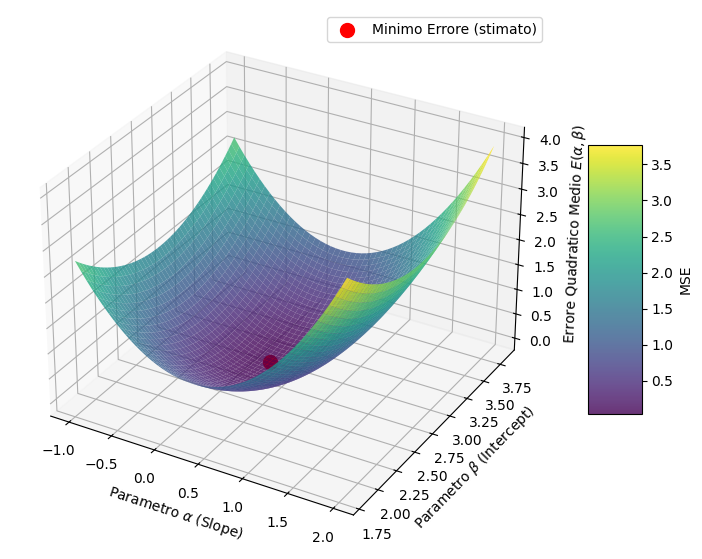

In [7]:


if 'X' not in locals() or 'y' not in locals():
    print("Variabili X e y non trovate, rigenero dati sintetici per la funzione d'errore.")
    print("Assicurati che i dati usati qui siano coerenti con il tuo caso di studio.")
    np.random.seed(42)
    X_placeholder_unscaled = np.random.uniform(60, 95, 100) 

    X_placeholder_scaled = (X_placeholder_unscaled - np.mean(X_placeholder_unscaled)) / np.std(X_placeholder_unscaled)
    
    base_demand_placeholder = 0.5
    slope_data_generation_placeholder = 0.03 * np.std(X_placeholder_unscaled) # 
    noise_std_dev_placeholder = 0.2
    y_placeholder = base_demand_placeholder + \
                    (slope_data_generation_placeholder/np.std(X_placeholder_unscaled)) * X_placeholder_unscaled + \
                    np.random.normal(0, noise_std_dev_placeholder, X_placeholder_unscaled.shape[0])
    y_placeholder = np.maximum(y_placeholder, 0.1)

    alpha_target_for_error_plot = slope_data_generation_placeholder 
    beta_target_for_error_plot = np.mean(y_placeholder) 
    
    y_data_for_error_plot = beta_target_for_error_plot + alpha_target_for_error_plot * X_placeholder_scaled + \
                            np.random.normal(0, noise_std_dev_placeholder, X_placeholder_scaled.shape[0])
    
    X_plot = X_placeholder_scaled
    y_plot = y_data_for_error_plot
else: 
    if X.ndim > 1:
      X_1d_unscaled = X.flatten()
    else:
      X_1d_unscaled = X
      
    X_plot = (X_1d_unscaled - np.mean(X_1d_unscaled)) / np.std(X_1d_unscaled)
    y_plot = y 


def mse_function(alpha, beta, x_points, y_points):
    predictions = alpha * x_points + beta
    errors = predictions - y_points
    return np.mean(errors**2)


alpha_range = np.linspace(alpha_target_for_error_plot - 1, alpha_target_for_error_plot + 1, 50) if 'alpha_target_for_error_plot' in locals() else np.linspace(-1, 2, 50)
beta_range = np.linspace(np.mean(y_plot) - 1, np.mean(y_plot) + 1, 50) if 'y_plot' in locals() else np.linspace(-1, 2, 50)


Alpha, Beta = np.meshgrid(alpha_range, beta_range)
Error_surface = np.zeros(Alpha.shape)

for i in range(Alpha.shape[0]):
    for j in range(Alpha.shape[1]):
        Error_surface[i, j] = mse_function(Alpha[i, j], Beta[i, j], X_plot, y_plot)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Alpha, Beta, Error_surface, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel(r'Parametro $\alpha$ (Slope)')
ax.set_ylabel(r'Parametro $\beta$ (Intercept)')
ax.set_zlabel(r'Errore Quadratico Medio $E(\alpha, \beta)$')
fig.colorbar(surf, shrink=0.5, aspect=5, label='MSE')


min_error_idx = np.unravel_index(np.argmin(Error_surface, axis=None), Error_surface.shape)
min_alpha = Alpha[min_error_idx]
min_beta = Beta[min_error_idx]
min_error_val = Error_surface[min_error_idx]
ax.scatter(min_alpha, min_beta, min_error_val, color='red', s=100, label='Minimo Errore (stimato)', depthshade=True)
ax.legend()

plt.savefig("error_function_3d.pdf", format="pdf", bbox_inches='tight')


print("Grafico 'error_function_3d.pdf' generato.")

alpha_optimal_plot = min_alpha
beta_optimal_plot = min_beta
X_for_gd_plot = X_plot
y_for_gd_plot = y_plot

Grafico 'gradient_descent_steps.pdf' generato.


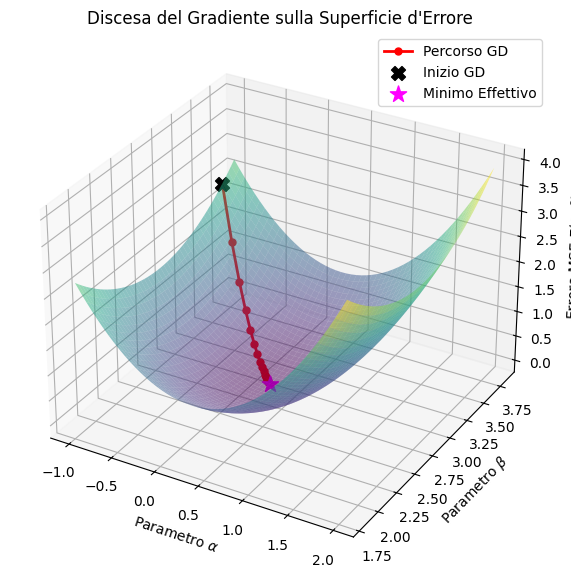

In [8]:



learning_rate = 0.1
n_iterations = 15


alpha_gd = alpha_range[0] 
beta_gd = beta_range[-5]  

path_alpha = [alpha_gd]
path_beta = [beta_gd]
path_error = [mse_function(alpha_gd, beta_gd, X_for_gd_plot, y_for_gd_plot)]

m = len(X_for_gd_plot)

for iteration in range(n_iterations):
    predictions = alpha_gd * X_for_gd_plot + beta_gd
    errors = predictions - y_for_gd_plot
    
    gradient_alpha = (2/m) * np.sum(errors * X_for_gd_plot)
    gradient_beta = (2/m) * np.sum(errors)
    
    alpha_gd = alpha_gd - learning_rate * gradient_alpha
    beta_gd = beta_gd - learning_rate * gradient_beta
    
    path_alpha.append(alpha_gd)
    path_beta.append(beta_gd)
    current_error = mse_function(alpha_gd, beta_gd, X_for_gd_plot, y_for_gd_plot)
    path_error.append(current_error)

path_alpha = np.array(path_alpha)
path_beta = np.array(path_beta)
path_error = np.array(path_error)

fig_gd = plt.figure(figsize=(10, 7))
ax_gd = fig_gd.add_subplot(111, projection='3d')

ax_gd.plot_surface(Alpha, Beta, Error_surface, cmap='viridis', edgecolor='none', alpha=0.5, rstride=1, cstride=1)

ax_gd.plot(path_alpha, path_beta, path_error, color='r', marker='o', markersize=5, linewidth=2, label='Percorso GD')
ax_gd.scatter(path_alpha[0], path_beta[0], path_error[0], color='black', s=100, label='Inizio GD', depthshade=True, marker='X')
ax_gd.scatter(alpha_optimal_plot, beta_optimal_plot, Error_surface.min(), color='magenta', s=150, label='Minimo Effettivo', marker='*', depthshade=True)


ax_gd.set_xlabel(r'Parametro $\alpha$')
ax_gd.set_ylabel(r'Parametro $\beta$')
ax_gd.set_zlabel(r'Errore MSE $E(\alpha, \beta)$')
ax_gd.set_title("Discesa del Gradiente sulla Superficie d'Errore")
ax_gd.legend()



plt.savefig("gradient_descent_steps.pdf", format="pdf", bbox_inches='tight')


print("Grafico 'gradient_descent_steps.pdf' generato.")
alpha_iterations = path_alpha
beta_iterations = path_beta

Generazione del grafico 'long_tail_graph.pdf'...


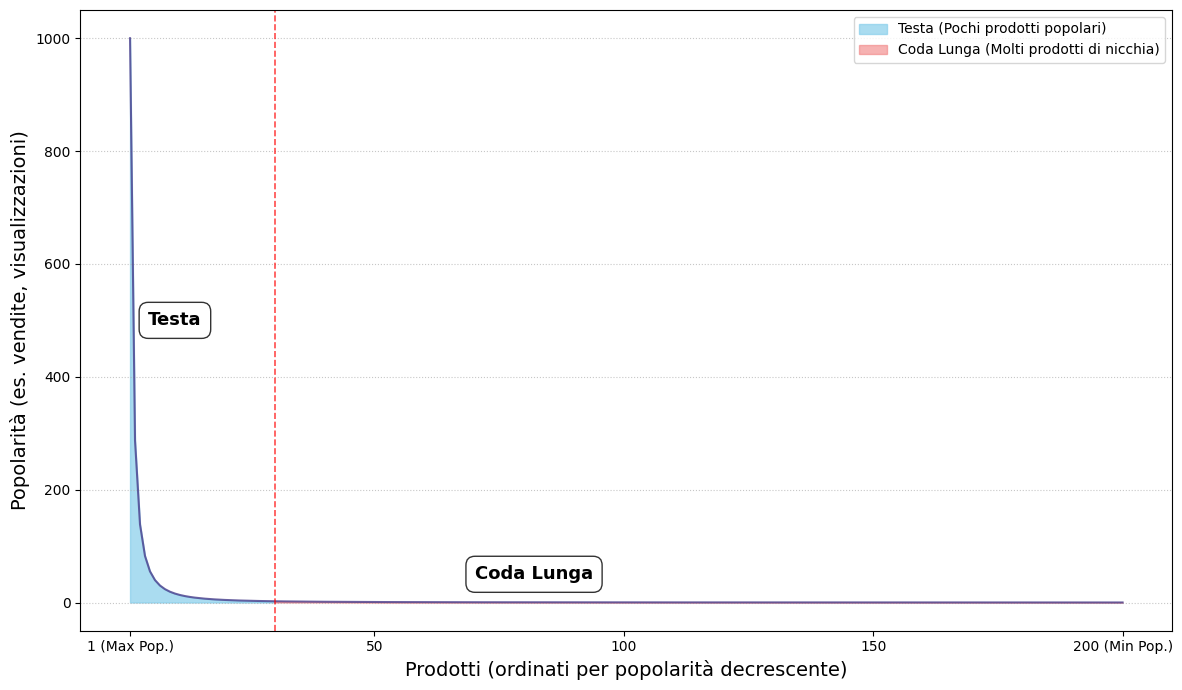

Plot 'long_tail_graph.pdf' generato.


In [9]:
def generate_long_tail_plot_revised():
    """
    Generates an improved plot illustrating the Long Tail phenomenon.
    Items are plotted by rank against their popularity using a line plot
    with filled areas for head and tail.
    """
    np.random.seed(42) # For reproducibility if any randomness were used beyond ranks

    # Parameters for the distribution
    a = 1.8  # Exponent for Zipf-like distribution; higher 'a' means steeper drop
    num_items = 200 # Total number of items

    # Generate ranks and popularities
    ranks = np.arange(1, num_items + 1)
    # Popularities follow a power law: P(r) ~ 1/r^a
    # The scaling factor 1000 is arbitrary, for illustration
    popularities = (1 / ranks**a) * 1000
    
    # Note: popularities are already sorted due to ranks being sorted.
    # Note: We are removing `popularities = np.maximum(popularities, 1)`
    # to show the natural decay of the tail.

    plt.figure(figsize=(12, 7)) # Slightly wider figure for better readability

    # Plot the overall popularity trend line
    plt.plot(ranks, popularities, color='darkslateblue', linewidth=1.5, alpha=0.8)

    # Define the boundary between head and tail
    head_limit_rank_idx = int(num_items * 0.15) # Index for slicing (0 to head_limit_rank_idx-1)
                                             # Rank is head_limit_rank_idx
                                             
    # Fill area for the "Head"
    plt.fill_between(ranks[:head_limit_rank_idx], popularities[:head_limit_rank_idx], 
                     color='skyblue', alpha=0.7, label='Testa (Pochi prodotti popolari)')
    
    # Fill area for the "Long Tail"
    # Ensure we start filling from the correct rank for the tail
    plt.fill_between(ranks[head_limit_rank_idx-1:], popularities[head_limit_rank_idx-1:], # Overlap by one point for continuous fill
                     color='lightcoral', alpha=0.6, label='Coda Lunga (Molti prodotti di nicchia)')

    # Labels and Title
    plt.xlabel("Prodotti (ordinati per popolarità decrescente)", fontsize=14)
    plt.ylabel("Popolarità (es. vendite, visualizzazioni)", fontsize=14)
    
    # X-axis ticks
    tick_positions = [1, num_items // 4, num_items // 2, 3 * num_items // 4, num_items]
    tick_labels = ['1 (Max Pop.)'] + [f'{pos}' for pos in tick_positions[1:-1]] + [f'{num_items} (Min Pop.)']
    plt.xticks(tick_positions, tick_labels, fontsize=10)
    plt.yticks(fontsize=10)

    # Vertical line separating head and tail
    # Plotting at rank head_limit_rank_idx. The visual line is between rank head_limit_rank_idx-1 and head_limit_rank_idx.
    # So, rank head_limit_rank_idx is the first item of the tail.
    # plt.axvline(ranks[head_limit_rank_idx-1] + 0.5, color='red', linestyle='--', linewidth=1.2, alpha=0.7)
    # A more robust way if ranks are not always integers starting at 1 or have gaps:
    # head_cutoff_rank_value = ranks[head_limit_rank_idx-1]
    # plt.axvline(head_cutoff_rank_value, color='red', linestyle='--', linewidth=1.2, alpha=0.7)
    # For current ranks, head_limit_rank_idx (e.g. 30 for 15%) is the rank number.
    # The line should be between rank X and X+1. For fill_between, the split is conceptually at head_limit_rank_idx.
    # So, the rank head_limit_rank_idx marks the beginning of the tail items.
    # The visual separator is best placed at this rank.
    plt.axvline(ranks[head_limit_rank_idx-1], color='red', linestyle='--', linewidth=1.2, alpha=0.7)


    # Annotations for "Testa" and "Coda Lunga"
    # Adjusting y-position of annotations to be more dynamic and appropriate
    
    # Head annotation
    head_annotation_x = ranks[int(head_limit_rank_idx * 0.3)] 
    head_annotation_y = popularities[0] * 0.5 # Place it relative to max popularity
    plt.text(head_annotation_x, head_annotation_y, 
             'Testa', 
             horizontalalignment='center', verticalalignment='center',
             fontsize=13, color='black', weight='bold',
             bbox=dict(facecolor='white', alpha=0.8, pad=5, boxstyle='round,pad=0.5'))
             
    # Tail annotation
    # Position it within the tail region, slightly above the curve
    tail_annotation_x = ranks[head_limit_rank_idx + int((num_items - head_limit_rank_idx) * 0.3)]
    # Y position relative to an actual popularity value in the tail plus an offset
    # Use a point a bit into the tail for y-reference
    y_ref_tail = popularities[min(head_limit_rank_idx + 5, num_items -1)] 
    # Add a small fraction of the total plot height as offset, or a fixed value
    # Dynamically: ensure it's above the tail start and visible
    tail_annotation_y = max(y_ref_tail + popularities[0]*0.02, popularities[0]*0.05) # Ensure it doesn't go too low
    if popularities[head_limit_rank_idx-1] < popularities[0]*0.05: # If tail is very flat and low
        tail_annotation_y = popularities[0]*0.05

    plt.text(tail_annotation_x, tail_annotation_y,
             'Coda Lunga', 
             horizontalalignment='center', verticalalignment='center',
             fontsize=13, color='black', weight='bold',
             bbox=dict(facecolor='white', alpha=0.8, pad=5, boxstyle='round,pad=0.5'))
             
    plt.grid(True, axis='y', linestyle=':', alpha=0.7)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout() 
    
    plt.savefig("long_tail_graph.pdf", bbox_inches='tight')
    plt.show() 
    print("Plot 'long_tail_graph.pdf' generato.")

if __name__ == '__main__':
    print("Generazione del grafico 'long_tail_graph.pdf'...")
    generate_long_tail_plot_revised()

Generazione del diagramma User-Based CF...


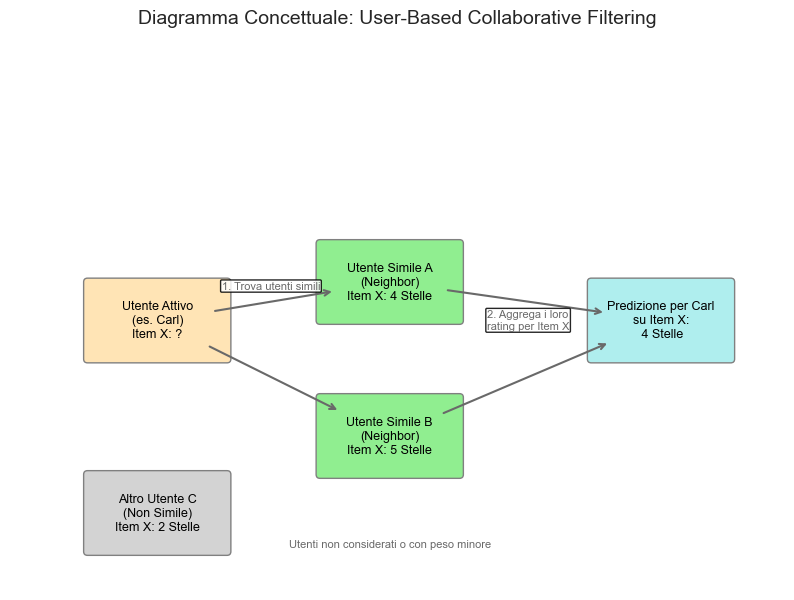

Plot 'user_based_cf_diagram.pdf' generato.

Generazione del diagramma Item-Based CF...


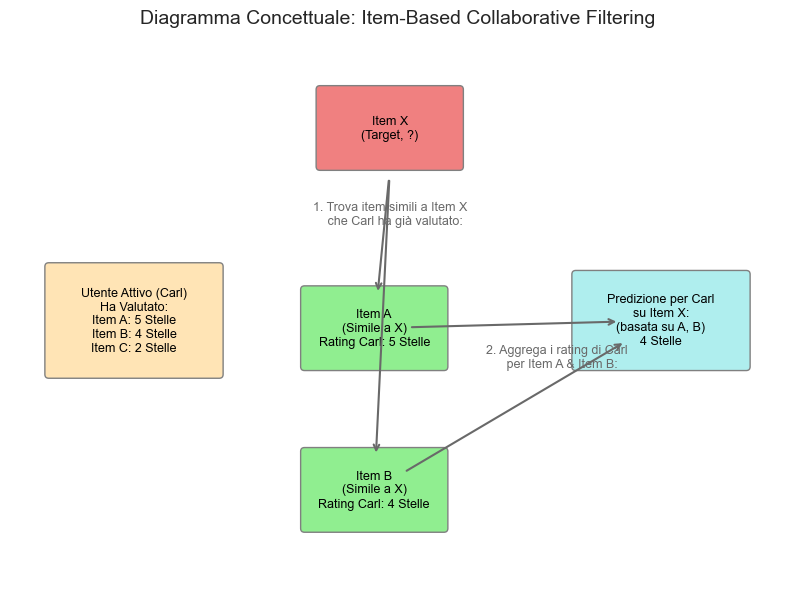

Plot 'item_based_cf_diagram.pdf' generato.


In [10]:


plt.style.use('seaborn-v0_8-whitegrid')

def draw_box(ax, xy, width, height, text, facecolor='lightsteelblue', text_color='black', fontsize=9):
    """Helper to draw a rounded box with text."""
    rect = patches.FancyBboxPatch(
        xy, width, height,
        boxstyle="round,pad=0.05,rounding_size=0.05",
        facecolor=facecolor,
        edgecolor="gray",
        linewidth=1
    )
    ax.add_patch(rect)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text,
            ha='center', va='center', fontsize=fontsize, color=text_color, wrap=True)

def draw_arrow(ax, start_center, end_center, start_radius, end_radius, 
               text="", color="dimgray", text_fontsize=8, text_offset_factor=0.15):
    """
    Helper to draw an arrow between the conceptual edges of two objects.
    start_center, end_center: (x,y) tuples for the centers of the objects.
    start_radius, end_radius: Effective radius from center to edge along the arrow path.
    """
    start_center = np.array(start_center)
    end_center = np.array(end_center)
    
    direction_vector = end_center - start_center
    length = np.linalg.norm(direction_vector)
    
    if length == 0: return 

    unit_vector = direction_vector / length

    
    arrow_start_point = start_center + unit_vector * start_radius
    arrow_end_point_nominal = end_center - unit_vector * end_radius
    
    
    arrow_vector = arrow_end_point_nominal - arrow_start_point
    arrow_visual_length = np.linalg.norm(arrow_vector)

    if arrow_visual_length < 0.01: 
        
        
        
        
        
        
        
        
        if text: 
             ax.text(start_center[0] + direction_vector[0] * 0.5, 
                     start_center[1] + direction_vector[1] * 0.5, 
                     text, ha='center', va='center', fontsize=text_fontsize, color=color,
                     bbox=dict(facecolor='white', alpha=0.85, pad=1, boxstyle='round,pad=0.1'))
        return

    ax.annotate("",
                xy=arrow_end_point_nominal, 
                xytext=arrow_start_point,   
                arrowprops=dict(arrowstyle="->", color=color, lw=1.5, 
                                connectionstyle="arc3,rad=0.0"), 
                )
    if text:
        
        mid_arrow_x = arrow_start_point[0] + arrow_vector[0] * 0.5
        mid_arrow_y = arrow_start_point[1] + arrow_vector[1] * 0.5
        
        
        perp_dx = -arrow_vector[1]
        perp_dy = arrow_vector[0]
        perp_length = np.linalg.norm([perp_dx, perp_dy])
        
        offset_val = text_offset_factor 

        if perp_length > 1e-6:
            text_x = mid_arrow_x + (perp_dx / perp_length) * offset_val
            text_y = mid_arrow_y + (perp_dy / perp_length) * offset_val
            
            if abs(arrow_vector[0]) > abs(arrow_vector[1]) and arrow_vector[1] < 0 : 
                 if unit_vector[0] < 0 : 
                     text_y = mid_arrow_y - (perp_dy / perp_length) * offset_val 
                 else: 
                     text_y = mid_arrow_y - (perp_dy / perp_length) * offset_val


        else: 
            text_x = start_center[0] + direction_vector[0] * 0.5
            text_y = start_center[1] + direction_vector[1] * 0.5 + offset_val*2


        ax.text(text_x, text_y, text,
                ha='center', va='center', fontsize=text_fontsize, color=color, fontweight='normal',
                bbox=dict(facecolor='white', alpha=0.85, pad=1, boxstyle='round,pad=0.1'))



def generate_user_based_cf_diagram():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 7)
    ax.axis('off')

    
    w, h = 1.8, 1.0
    user_active_center = (1 + w/2, 3 + h/2)
    neighbor1_center = (4 + w/2, 3.5 + h/2)
    neighbor2_center = (4 + w/2, 1.5 + h/2)
    pred_rating_center = (7.5 + w/2, 3 + h/2)
    
    user_rad, neighbor_rad, pred_rad = max(w,h)/2 * 0.8, max(w,h)/2 * 0.8, max(w,h)/2 * 0.8


    draw_box(ax, (1, 3), w, h, "Utente Attivo\n(es. Carl)\nItem X: ?", facecolor='moccasin')
    draw_box(ax, (4, 3.5), w, h, "Utente Simile A\n(Neighbor)\nItem X: 4 Stelle", facecolor='lightgreen')
    draw_box(ax, (4, 1.5), w, h, "Utente Simile B\n(Neighbor)\nItem X: 5 Stelle", facecolor='lightgreen')
    draw_box(ax, (1, 0.5), w, h, "Altro Utente C\n(Non Simile)\nItem X: 2 Stelle", facecolor='lightgray')
    draw_box(ax, (7.5, 3), w, h, "Predizione per Carl\nsu Item X:\n 4 Stelle", facecolor='paleturquoise')

    
    draw_arrow(ax, user_active_center, neighbor1_center, user_rad, neighbor_rad, "1. Trova utenti simili", text_offset_factor=0.2)
    draw_arrow(ax, user_active_center, neighbor2_center, user_rad, neighbor_rad, "", text_offset_factor=0.2) 

    ax.text(4 + w/2, 0.6, "Utenti non considerati o con peso minore", ha='center', va='center', fontsize=8, color='dimgray')

    draw_arrow(ax, neighbor1_center, pred_rating_center, neighbor_rad, pred_rad, "2. Aggrega i loro\nrating per Item X", text_offset_factor=0.25)
    draw_arrow(ax, neighbor2_center, pred_rating_center, neighbor_rad, pred_rad, "", text_offset_factor=0.2)

    ax.set_title("Diagramma Concettuale: User-Based Collaborative Filtering", fontsize=14, pad=20)
    plt.savefig("user_based_cf_diagram.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'user_based_cf_diagram.pdf' generato.")



def generate_item_based_cf_diagram():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 7)
    ax.axis('off')

    
    user_w, user_h = 2.2, 1.4 
    user_xy = (0.5, 2.8)

    item_w, item_h = 1.8, 1.0 
    target_item_xy = (4.0, 5.5)
    
    sim_item1_xy = (3.8, 2.9) 
    sim_item2_xy = (3.8, 0.8) 
    
    pred_w, pred_h = 2.2, 1.2
    pred_rating_xy = (7.3, 2.9)

    
    
    user_center = (user_xy[0] + user_w/2, user_xy[1] + user_h/2)
    user_rad = min(user_w, user_h)/2 * 0.9 

    target_item_center = (target_item_xy[0] + item_w/2, target_item_xy[1] + item_h/2)
    target_item_rad = min(item_w, item_h)/2 * 0.9

    sim_item1_center = (sim_item1_xy[0] + item_w/2, sim_item1_xy[1] + item_h/2)
    sim_item_rad = min(item_w, item_h)/2 * 0.9 

    sim_item2_center = (sim_item2_xy[0] + item_w/2, sim_item2_xy[1] + item_h/2)

    pred_center = (pred_rating_xy[0] + pred_w/2, pred_rating_xy[1] + pred_h/2)
    pred_rad = min(pred_w, pred_h)/2 * 0.9


    
    draw_box(ax, user_xy, user_w, user_h, "Utente Attivo (Carl)\nHa Valutato:\nItem A: 5 Stelle\nItem B: 4 Stelle\nItem C: 2 Stelle", facecolor='moccasin')
    draw_box(ax, target_item_xy, item_w, item_h, "Item X\n(Target, ?)", facecolor='lightcoral')
    draw_box(ax, sim_item1_xy, item_w, item_h, "Item A\n(Simile a X)\nRating Carl: 5 Stelle", facecolor='lightgreen')
    draw_box(ax, sim_item2_xy, item_w, item_h, "Item B\n(Simile a X)\nRating Carl: 4 Stelle", facecolor='lightgreen')
    draw_box(ax, pred_rating_xy, pred_w, pred_h, "Predizione per Carl\nsu Item X:\n(basata su A, B)\n4 Stelle", facecolor='paleturquoise')

    
    
    ax.text(target_item_center[0], target_item_center[1] - target_item_rad - 0.5, 
            "1. Trova item simili a Item X\n   che Carl ha già valutato:", 
            ha='center', va='top', fontsize=9, color='dimgray',
            bbox=dict(facecolor='white', alpha=0.0, pad=0)) 
    
    
    
    arrow_origin_step1 = (target_item_center[0], target_item_center[1] - target_item_rad - 0.1)
    draw_arrow(ax, arrow_origin_step1, sim_item1_center, 0.1, sim_item_rad, text="", text_offset_factor=0.2) 
    draw_arrow(ax, arrow_origin_step1, sim_item2_center, 0.1, sim_item_rad, text="", text_offset_factor=0.2)
    
    
    
    ax.text( (sim_item1_center[0] + pred_center[0])/2 + 0.5, 
             (sim_item1_center[1] + sim_item2_center[1])/2 + 0.5, 
            "2. Aggrega i rating di Carl\n   per Item A & Item B:", 
            ha='center', va='bottom', fontsize=9, color='dimgray',
            bbox=dict(facecolor='white', alpha=0.0, pad=0))

    draw_arrow(ax, sim_item1_center, pred_center, sim_item_rad, pred_rad, text="", text_offset_factor=0.2)
    draw_arrow(ax, sim_item2_center, pred_center, sim_item_rad, pred_rad, text="", text_offset_factor=0.2)


    ax.set_title("Diagramma Concettuale: Item-Based Collaborative Filtering", fontsize=14, pad=20)
    plt.savefig("item_based_cf_diagram.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'item_based_cf_diagram.pdf' generato.")


if __name__ == '__main__':
    print("Generazione del diagramma User-Based CF...")
    generate_user_based_cf_diagram() 
    print("\nGenerazione del diagramma Item-Based CF...")
    generate_item_based_cf_diagram()

Generazione del grafico 'cell_classification_scatter.pdf' (versione rivista)...


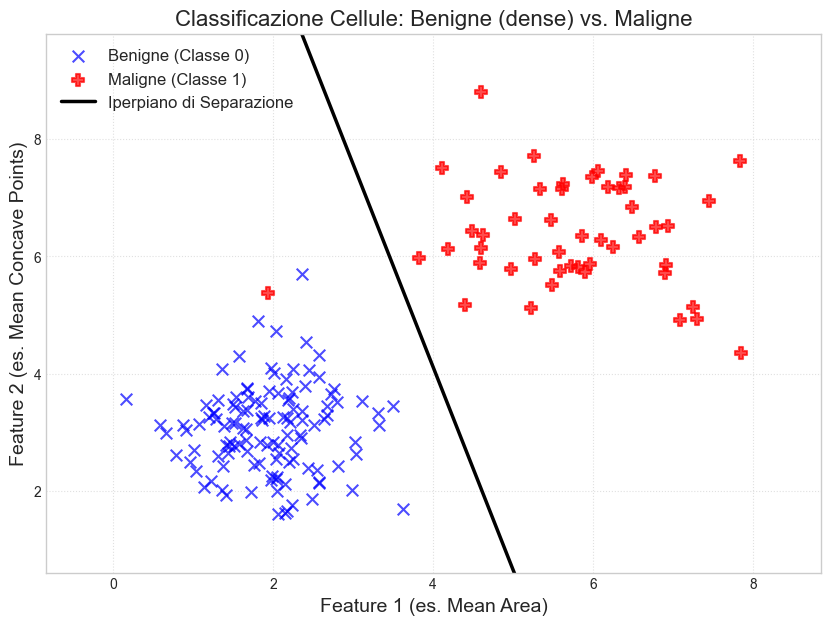

Plot 'cell_classification_scatter.pdf' generato (con linea calcolata e densità differenziata).


In [11]:

plt.style.use('seaborn-v0_8-whitegrid')

def generate_cell_classification_scatter_plot_revised():
    """
    Generates a scatter plot for binary classification (e.g., tumor cells)
    with two features. Benign class is denser. The separating hyperplane
    is calculated by a Logistic Regression model.
    """
    np.random.seed(42) 

    
    
    
    
    n_samples_benign = 120  
    n_samples_malignant = 50 
    
    
    
    centers = [[2, 3], [5.5, 6.5]] 
    cluster_stds = [0.7, 1.1]    

    X, y = make_blobs(n_samples=[n_samples_benign, n_samples_malignant], 
                      centers=centers, 
                      cluster_std=cluster_stds,
                      random_state=42, 
                      n_features=2)
    
    

    
    classifier = LogisticRegression(solver='liblinear', random_state=42)
    classifier.fit(X, y)

    
    w = classifier.coef_[0]
    
    b_intercept = classifier.intercept_[0] 

    plt.figure(figsize=(10, 7))
    
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                color='blue', marker='x', s=70, 
                label='Benigne (Classe 0)', alpha=0.7, linewidths=1.5)
    
    
    plt.scatter(X[y == 1, 0], X[y == 1, 1], 
                color='red', marker='P', s=80, 
                label='Maligne (Classe 1)', alpha=0.7, linewidths=1.5)

    
    
    x_line_vals = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    
    
    
    
    
    if abs(w[1]) > 1e-5: 
        y_line_vals = (-w[0] * x_line_vals - b_intercept) / w[1]
        plt.plot(x_line_vals, y_line_vals, color='black', linestyle='-', 
                 linewidth=2.5, label='Iperpiano di Separazione')
    elif abs(w[0]) > 1e-5: 
        
        x_boundary = -b_intercept / w[0]
        plt.axvline(x_boundary, color='black', linestyle='-', 
                    linewidth=2.5, label='Iperpiano di Separazione')
    

    
    plt.xlabel("Feature 1 (es. Mean Area)", fontsize=14)
    plt.ylabel("Feature 2 (es. Mean Concave Points)", fontsize=14)
    plt.title("Classificazione Cellule: Benigne (dense) vs. Maligne", fontsize=16)
    plt.legend(fontsize=12, loc='upper left')
    
    
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.grid(True, linestyle=':', alpha=0.6)
    
    
    plt.savefig("cell_classification_scatter.pdf", bbox_inches='tight')
    plt.show() 
    print("Plot 'cell_classification_scatter.pdf' generato (con linea calcolata e densità differenziata).")


if __name__ == '__main__':
    print("Generazione del grafico 'cell_classification_scatter.pdf' (versione rivista)...")
    generate_cell_classification_scatter_plot_revised()

In [12]:

if 'temperatures_F' not in locals() or 'peak_demand_GW' not in locals():
    print("Variabili temperatures_F e peak_demand_GW non trovate, rigenero dati sintetici.")
    np.random.seed(42) 
    temperatures_F = np.random.uniform(60, 95, 200)
    base_demand = 0.5
    slope_data_generation = 0.03
    noise_std_dev = 0.2
    peak_demand_GW = base_demand + slope_data_generation * temperatures_F + np.random.normal(0, noise_std_dev, temperatures_F.shape[0])
    peak_demand_GW = np.maximum(peak_demand_GW, 0.1) 


X_norm = (temperatures_F - temperatures_F.min()) / (temperatures_F.max() - temperatures_F.min())
y_norm = (peak_demand_GW - peak_demand_GW.min()) / (peak_demand_GW.max() - peak_demand_GW.min())


learning_rate_prog = 0.1
n_total_iterations_prog = 51 

alpha_prog = 0.0  
beta_prog = 0.0   

m_prog = len(X_norm)
history_params = [] 


iterations_to_plot = [0, 1, 5, 50]

for iteration in range(n_total_iterations_prog):
    
    if iteration in iterations_to_plot:
        history_params.append((iteration, alpha_prog, beta_prog))
        
    
    predictions_prog = alpha_prog * X_norm + beta_prog
    
    
    errors_prog = predictions_prog - y_norm
    
    
    gradient_alpha_prog = (2/m_prog) * np.sum(errors_prog * X_norm)
    gradient_beta_prog = (2/m_prog) * np.sum(errors_prog)
    
    
    alpha_prog = alpha_prog - learning_rate_prog * gradient_alpha_prog
    beta_prog = beta_prog - learning_rate_prog * gradient_beta_prog


for iter_num, alpha_val, beta_val in history_params:
    
    fig, ax = plt.subplots(figsize=(8, 6)) 
    
    
    ax.scatter(X_norm, y_norm, marker='x', color='dodgerblue', alpha=0.5, label='Dati Normalizzati')
    
    
    
    x_line_norm = np.array([X_norm.min(), X_norm.max()]) 
    y_line_prog = alpha_val * x_line_norm + beta_val
    
    ax.plot(x_line_norm, y_line_prog, color='red', linewidth=2, 
            label=f'Iter {iter_num}: $\\alpha$={alpha_val:.2f}, $\\beta$={beta_val:.2f}')
    
    
    ax.set_title(f'Regressione Lineare - Iterazione {iter_num}')
    ax.set_xlabel("Temperatura Normalizzata")
    ax.set_ylabel("Domanda Normalizzata")
    
    
    ax.grid(True, linestyle='--', alpha=0.5)
    
    
    ax.legend(fontsize='small')
    
    
    ax.set_ylim(-0.1, 1.1) 
    ax.set_xlim(-0.1, 1.1) 

    
    plt.tight_layout()
    
    
    file_name = f"regression_iteration_{iter_num}.pdf"
    plt.savefig(file_name, format="pdf", bbox_inches='tight')
    print(f"Grafico '{file_name}' generato.")
    
    
    plt.close(fig)



print("\nProcesso di generazione dei grafici completato.")

Grafico 'regression_iteration_0.pdf' generato.
Grafico 'regression_iteration_1.pdf' generato.
Grafico 'regression_iteration_5.pdf' generato.
Grafico 'regression_iteration_50.pdf' generato.

Processo di generazione dei grafici completato.


--- Dataset Configuration ---
Number of observations (m): 4
Number of features (n): 2

--- Initial Matrices and Vectors ---
Design Matrix X (with intercept column):
[[ 1.  7.  4.]
 [ 1.  8.  5.]
 [ 1.  7. 10.]
 [ 1.  3.  7.]]
Shape: (4, 3)

Target Vector y:
[[10.09]
 [10.38]
 [ 4.27]
 [ 1.17]]
Shape: (4, 1)

Initial Parameter Vector theta (theta_k):
[[0.]
 [0.]
 [0.]]
Shape: (3, 1)

--- Gradient Descent Step Details ---
Learning rate (eta): 0.01

Predictions (X @ theta_k):
[[0.]
 [0.]
 [0.]
 [0.]]
Shape: (4, 1)

Errors (Predictions - y):
[[-10.09]
 [-10.38]
 [ -4.27]
 [ -1.17]]
Shape: (4, 1)

Gradient (nabla E(theta)): (2/m) * X^T @ (X@theta_k - y)
[[-12.9549]
 [-93.5338]
 [-71.5643]]
Shape: (3, 1)

Updated Parameter Vector (theta_{k+1}):
[[0.1295]
 [0.9353]
 [0.7156]]
Shape: (3, 1)


Visualizzazione di X e y salvata in 'matrix_X_y_representation.pdf'
Puoi usare questo file nel tuo documento LaTeX: \includegraphics[width=0.8\textwidth]{matrix_X_y_representation.pdf}


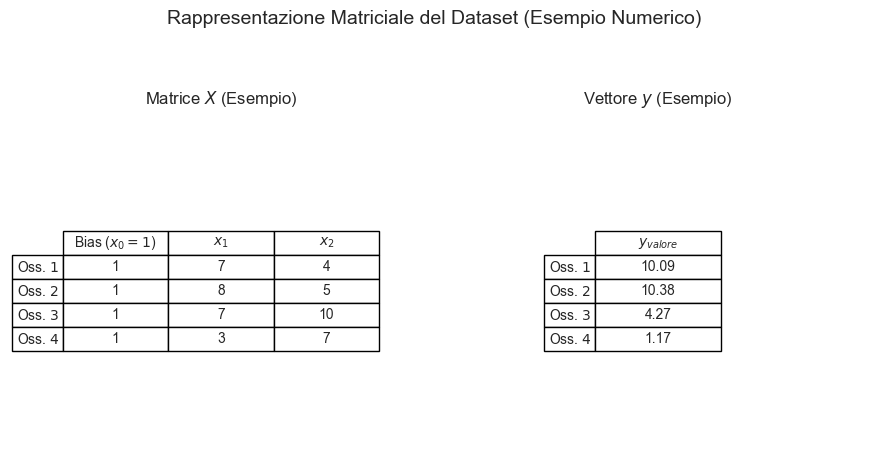

In [13]:

m = 4  
n = 2  

print(f"--- Dataset Configuration ---")
print(f"Number of observations (m): {m}")
print(f"Number of features (n): {n}\n")



np.random.seed(42) 
X_features = np.random.randint(1, 11, size=(m, n)) 




X_matrix = np.concatenate([np.ones((m, 1)), X_features], axis=1)






true_theta_example = np.array([[2.0], [1.5], [-0.8]]) 
if true_theta_example.shape[0] != (n + 1):
    
    true_theta_example = np.random.rand(n+1,1)
    print(f"Adjusted true_theta_example to shape ({n+1},1) for demonstration\n")

y_vector = X_matrix @ true_theta_example + np.random.normal(0, 0.5, (m, 1)) 



theta_initial = np.zeros((n + 1, 1))


eta = 0.01

print("--- Initial Matrices and Vectors ---")
print("Design Matrix X (with intercept column):")
print(X_matrix)
print(f"Shape: {X_matrix.shape}\n")

print("Target Vector y:")
print(np.round(y_vector, 2))
print(f"Shape: {y_vector.shape}\n")

print("Initial Parameter Vector theta (theta_k):")
print(theta_initial)
print(f"Shape: {theta_initial.shape}\n")





predictions = X_matrix @ theta_initial


errors = predictions - y_vector



gradient = (2/m) * (X_matrix.T @ errors)


theta_new = theta_initial - eta * gradient

print("--- Gradient Descent Step Details ---")
print(f"Learning rate (eta): {eta}\n")

print("Predictions (X @ theta_k):")
print(np.round(predictions, 2))
print(f"Shape: {predictions.shape}\n")

print("Errors (Predictions - y):")
print(np.round(errors, 2))
print(f"Shape: {errors.shape}\n")

print("Gradient (nabla E(theta)): (2/m) * X^T @ (X@theta_k - y)")
print(np.round(gradient, 4))
print(f"Shape: {gradient.shape}\n")

print("Updated Parameter Vector (theta_{k+1}):")
print(np.round(theta_new, 4))
print(f"Shape: {theta_new.shape}\n")






fig_vis, axs_vis = plt.subplots(1, 2, figsize=(9, 3 + m * 0.5)) 


axs_vis[0].set_title(r'Matrice $X$ (Esempio)', fontsize=12, y=1.08)
col_labels_X = ['Bias ($x_0=1$)'] + [f'$x_{j+1}$' for j in range(n)]
row_labels_X = [f'Oss. ${i+1}$' for i in range(m)]

cell_text_X = [[f"{val:.2f}" if val % 1 != 0 else f"{int(val)}" for val in row] for row in X_matrix]

table_X = axs_vis[0].table(cellText=cell_text_X,
                           rowLabels=row_labels_X,
                           colLabels=col_labels_X,
                           loc='center',
                           cellLoc='center',
                           colWidths=[0.25] * (n + 1) 
                           )
table_X.auto_set_font_size(False)
table_X.set_fontsize(10)
table_X.scale(1, 1.8) 
axs_vis[0].axis('tight')
axs_vis[0].axis('off') 


axs_vis[1].set_title(r'Vettore $y$ (Esempio)', fontsize=12, y=1.08)
col_labels_y = ['$y_{valore}$']
row_labels_y = [f'Oss. ${i+1}$' for i in range(m)]
cell_text_y = [[f"{val[0]:.2f}"] for val in y_vector]


table_y = axs_vis[1].table(cellText=cell_text_y,
                           rowLabels=row_labels_y,
                           colLabels=col_labels_y,
                           loc='center',
                           cellLoc='center',
                           colWidths=[0.3] 
                           )
table_y.auto_set_font_size(False)
table_y.set_fontsize(10)
table_y.scale(1, 1.8) 
axs_vis[1].axis('tight')
axs_vis[1].axis('off')

fig_vis.suptitle('Rappresentazione Matriciale del Dataset (Esempio Numerico)', fontsize=14, y=0.95)
plt.tight_layout(rect=[0, 0.05, 1, 0.9]) 


file_path_pdf = "matrix_X_y_representation.pdf"
try:
    plt.savefig(file_path_pdf, bbox_inches='tight')
    print(f"\nVisualizzazione di X e y salvata in '{file_path_pdf}'")
    print("Puoi usare questo file nel tuo documento LaTeX: \\includegraphics[width=0.8\\textwidth]{matrix_X_y_representation.pdf}")
except Exception as e:
    print(f"\nErrore nel salvataggio del file: {e}")


plt.show() 

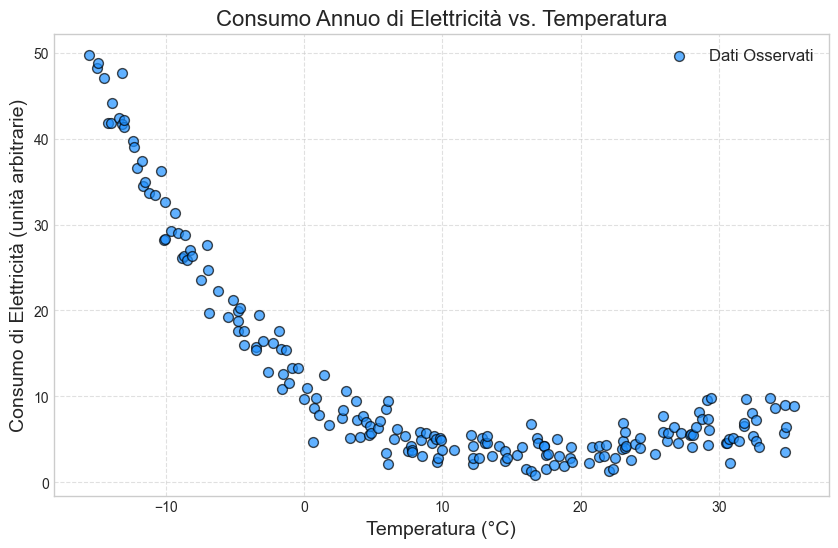

Plot 'electricity_yearly_scatter.pdf' generato.

--- Regressione Lineare Semplice ---
MSE Lineare: 62.392
R^2 Lineare: 0.585


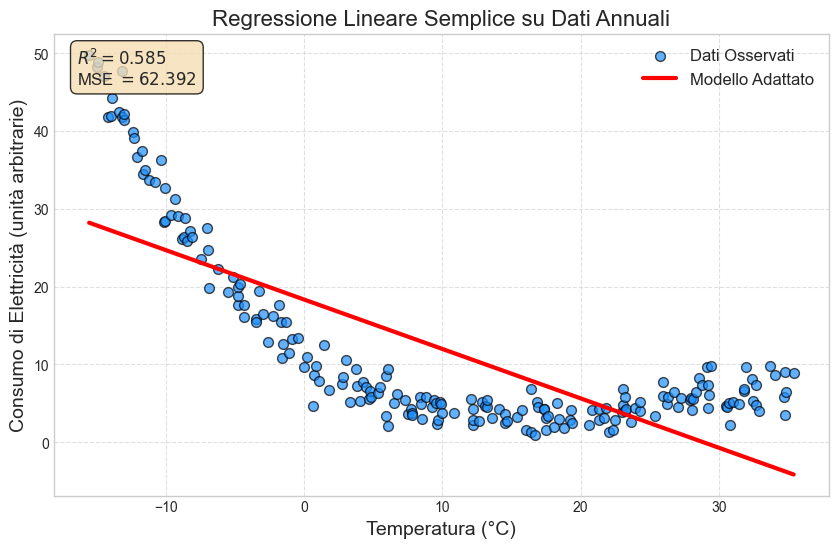

Plot 'electricity_yearly_linear_fit.pdf' generato.

--- Regressione Polinomiale (Grado 2) ---
MSE Polinomiale (Grado 2): 7.522
R^2 Polinomiale (Grado 2): 0.950


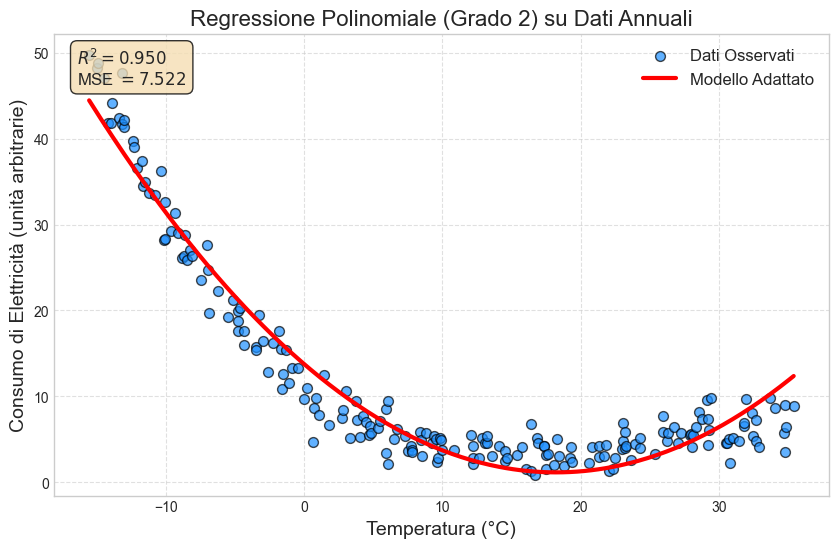

Plot 'electricity_yearly_poly2_fit.pdf' generato.

--- Regressione Polinomiale (Grado 3) ---
MSE Polinomiale (Grado 3): 3.107
R^2 Polinomiale (Grado 3): 0.979


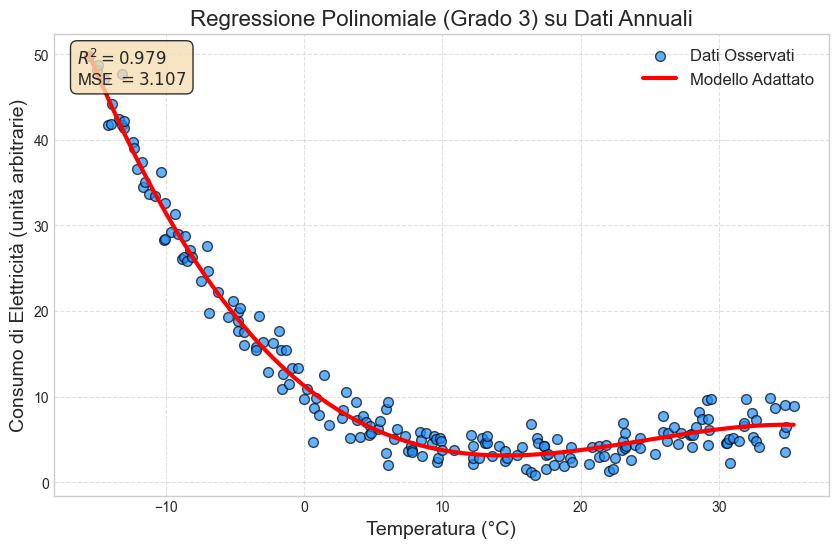

Plot 'electricity_yearly_poly3_fit.pdf' generato.

--- Considerazioni sulle Metriche MSE ---
Per riferimento, la varianza totale dei dati y (SS_tot) è circa: 30033.740
I valori di MSE (es. 0.036, 0.025) menzionati nel testo potrebbero riferirsi a dati y normalizzati o scalati diversamente.
Questa implementazione usa i dati y generati direttamente, quindi i valori assoluti di MSE dipendono dalla loro scala.


In [14]:

np.random.seed(42)


num_points = 200



temp_points = np.linspace(-15, 35, num_points)

temp_data = temp_points + np.random.normal(0, 2.0, num_points)
temp_data = np.sort(temp_data) 




center_temp = 15.0       
coeff_quad = 0.025       
coeff_cubic = -0.0008    
base_demand = 3.0        
noise_level = 1.8        

y_signal = base_demand + \
           coeff_quad * (temp_data - center_temp)**2 + \
           coeff_cubic * (temp_data - center_temp)**3
y_data = y_signal + np.random.normal(0, noise_level, num_points)
y_data = np.maximum(y_data, 0.2) 


X = temp_data.reshape(-1, 1)
y = y_data


def plot_regression(X_actual, y_actual, X_line, y_line, title, filename, r2=None, mse=None, is_scatter_only=False):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_actual, y_actual, alpha=0.7, label='Dati Osservati', color='dodgerblue', edgecolor='k', s=50)
    
    if not is_scatter_only and y_line is not None:
        plt.plot(X_line, y_line, color='red', linewidth=3, label='Modello Adattato')
        
    plt.title(title, fontsize=16)
    plt.xlabel("Temperatura (°C)", fontsize=14)
    plt.ylabel("Consumo di Elettricità (unità arbitrarie)", fontsize=14) 
    
    text_content = []
    if r2 is not None:
        text_content.append(f"$R^2 = {r2:.3f}$")
    if mse is not None:
        
        
        
        text_content.append(f"MSE $= {mse:.3f}$")
        
    if text_content:
        plt.text(0.03, 0.97, "\n".join(text_content), transform=plt.gca().transAxes, 
                 fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='wheat', alpha=0.8))
        
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.show()
    print(f"Plot '{filename}' generato.")


plot_regression(X, y, None, None,
                "Consumo Annuo di Elettricità vs. Temperatura",
                "electricity_yearly_scatter.pdf",
                is_scatter_only=True)


print("\n--- Regressione Lineare Semplice ---")
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
print(f"MSE Lineare: {mse_linear:.3f}")
print(f"R^2 Lineare: {r2_linear:.3f}") 

plot_regression(X, y, X, y_pred_linear,
                "Regressione Lineare Semplice su Dati Annuali",
                "electricity_yearly_linear_fit.pdf",
                r2=r2_linear, mse=mse_linear)


print("\n--- Regressione Polinomiale (Grado 2) ---")
poly_features_deg2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features_deg2.fit_transform(X)

poly2_model = LinearRegression()
poly2_model.fit(X_poly2, y)


X_plot_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_plot_poly2 = poly_features_deg2.transform(X_plot_smooth)
y_pred_poly2_line = poly2_model.predict(X_plot_poly2)


y_pred_poly2_data = poly2_model.predict(X_poly2)
mse_poly2 = mean_squared_error(y, y_pred_poly2_data)
r2_poly2 = r2_score(y, y_pred_poly2_data)
print(f"MSE Polinomiale (Grado 2): {mse_poly2:.3f}") 
print(f"R^2 Polinomiale (Grado 2): {r2_poly2:.3f}") 

plot_regression(X, y, X_plot_smooth, y_pred_poly2_line,
                "Regressione Polinomiale (Grado 2) su Dati Annuali",
                "electricity_yearly_poly2_fit.pdf",
                r2=r2_poly2, mse=mse_poly2)


print("\n--- Regressione Polinomiale (Grado 3) ---")
poly_features_deg3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly_features_deg3.fit_transform(X)

poly3_model = LinearRegression()
poly3_model.fit(X_poly3, y)

X_plot_poly3 = poly_features_deg3.transform(X_plot_smooth)
y_pred_poly3_line = poly3_model.predict(X_plot_poly3)


y_pred_poly3_data = poly3_model.predict(X_poly3)
mse_poly3 = mean_squared_error(y, y_pred_poly3_data)
r2_poly3 = r2_score(y, y_pred_poly3_data)
print(f"MSE Polinomiale (Grado 3): {mse_poly3:.3f}") 
print(f"R^2 Polinomiale (Grado 3): {r2_poly3:.3f}") 

plot_regression(X, y, X_plot_smooth, y_pred_poly3_line,
                "Regressione Polinomiale (Grado 3) su Dati Annuali",
                "electricity_yearly_poly3_fit.pdf",
                r2=r2_poly3, mse=mse_poly3)

print("\n--- Considerazioni sulle Metriche MSE ---")
total_variance = np.var(y) * len(y) 
print(f"Per riferimento, la varianza totale dei dati y (SS_tot) è circa: {((y - y.mean())**2).sum():.3f}")
print("I valori di MSE (es. 0.036, 0.025) menzionati nel testo potrebbero riferirsi a dati y normalizzati o scalati diversamente.")
print("Questa implementazione usa i dati y generati direttamente, quindi i valori assoluti di MSE dipendono dalla loro scala.")

Generazione del grafico 'error_vs_complexity.pdf'...


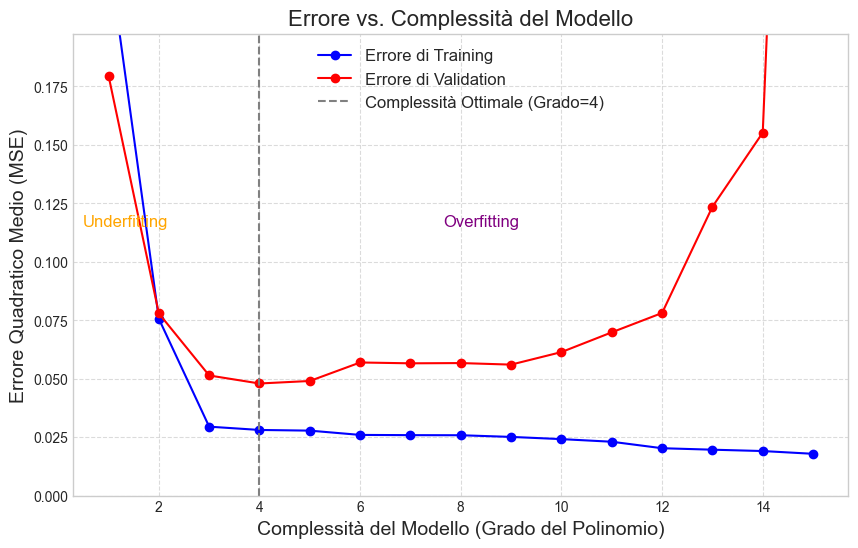

Plot 'error_vs_complexity.pdf' generato.

Generazione del grafico 'under_over_fitting.pdf'...


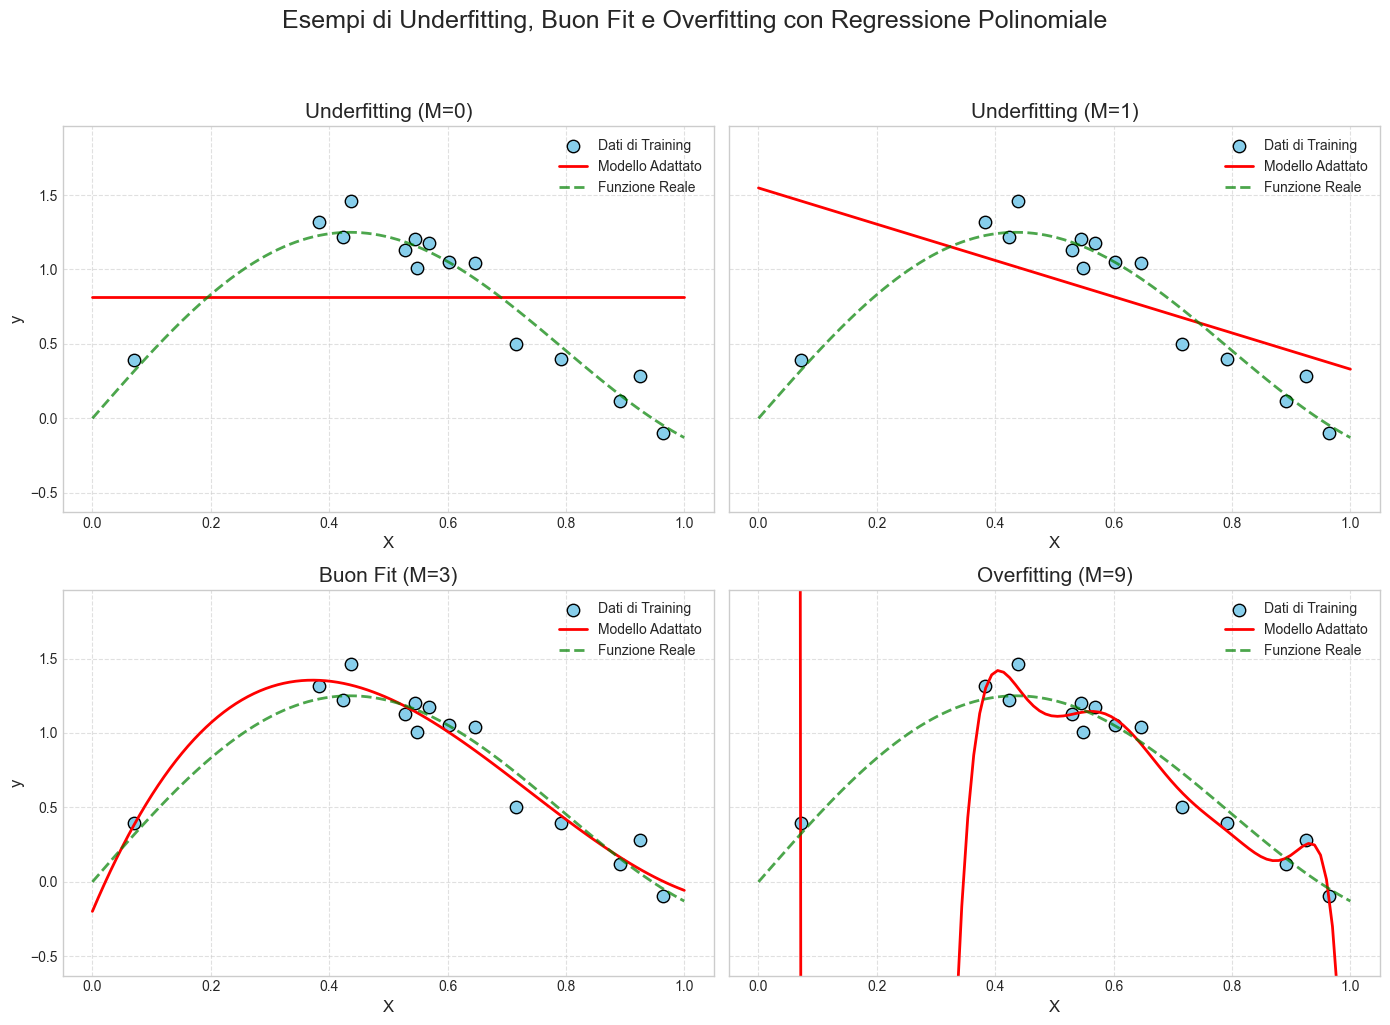

Plot 'under_over_fitting.pdf' generato.


In [15]:

def generate_error_vs_complexity_plot():
    np.random.seed(42)

    
    def true_func(X):
        return np.cos(1.5 * np.pi * X) + 0.5 * X 

    
    n_train_samples = 30
    n_val_samples = 100
    noise_level = 0.2

    X_train = np.sort(np.random.rand(n_train_samples))
    y_train = true_func(X_train) + np.random.normal(0, noise_level, n_train_samples)

    X_val = np.sort(np.random.rand(n_val_samples)) 
    y_val = true_func(X_val) + np.random.normal(0, noise_level, n_val_samples)
    
    
    


    max_degree = 15  
    degrees = np.arange(1, max_degree + 1)
    train_errors, val_errors = [], []

    for degree in degrees:
        
        model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
        model.fit(X_train.reshape(-1, 1), y_train)

        
        y_train_pred = model.predict(X_train.reshape(-1, 1))
        train_errors.append(mean_squared_error(y_train, y_train_pred))

        
        y_val_pred = model.predict(X_val.reshape(-1, 1))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_errors, marker='o', linestyle='-', color='blue', label='Errore di Training')
    plt.plot(degrees, val_errors, marker='o', linestyle='-', color='red', label='Errore di Validation')

    optimal_degree_idx = np.argmin(val_errors)
    optimal_degree = degrees[optimal_degree_idx]
    min_val_error = val_errors[optimal_degree_idx]

    plt.axvline(optimal_degree, linestyle='--', color='gray', label=f'Complessità Ottimale (Grado={optimal_degree})')
    
    plt.xlabel("Complessità del Modello (Grado del Polinomio)", fontsize=14)
    plt.ylabel("Errore Quadratico Medio (MSE)", fontsize=14)
    plt.title("Errore vs. Complessità del Modello", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, np.max(val_errors[0:int(max_degree/1.5)])*1.1) 
    
    plt.text(optimal_degree / 3, min_val_error + 0.1*np.max(val_errors), 'Underfitting', horizontalalignment='center', fontsize=12, color='orange')
    plt.text(optimal_degree + (max_degree-optimal_degree)/2.5 , min_val_error + 0.1*np.max(val_errors), 'Overfitting', horizontalalignment='center', fontsize=12, color='purple')


    plt.savefig("error_vs_complexity.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'error_vs_complexity.pdf' generato.")



def generate_under_over_fitting_examples_plot():
    np.random.seed(0) 

    
    def true_func_fitting_example(X):
        return np.sin(1.8 * np.pi * X * 0.7) + X * 0.6 

    n_samples = 15  
    noise_level_fit = 0.15

    
    X_sample = np.sort(np.random.rand(n_samples)) 
    y_sample = true_func_fitting_example(X_sample) + np.random.normal(0, noise_level_fit, n_samples)

    
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)

    degrees_to_plot = [0, 1, 3, 9] 
    titles = [
        "Underfitting (M=0)", 
        "Underfitting (M=1)", 
        "Buon Fit (M=3)", 
        "Overfitting (M=9)"
    ]

    fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True) 
    axs = axs.flatten()

    for i, degree in enumerate(degrees_to_plot):
        ax = axs[i]
        ax.scatter(X_sample, y_sample, edgecolor='k', s=80, label='Dati di Training', color='skyblue')

        if degree == 0: 
            y_pred_plot = np.full_like(X_plot, np.mean(y_sample))
        else:
            model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
            model.fit(X_sample.reshape(-1, 1), y_sample)
            y_pred_plot = model.predict(X_plot)
        
        ax.plot(X_plot, y_pred_plot, color='red', linewidth=2, label='Modello Adattato')
        ax.plot(X_plot, true_func_fitting_example(X_plot.squeeze()), color='green', linestyle='--', linewidth=2, alpha=0.7, label='Funzione Reale')
        
        ax.set_title(titles[i], fontsize=15)
        ax.set_xlabel("X", fontsize=12)
        if i % 2 == 0: 
            ax.set_ylabel("y", fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=10)
        ax.set_ylim(min(y_sample.min(), true_func_fitting_example(X_plot.squeeze()).min()) - 0.5, 
                    max(y_sample.max(), true_func_fitting_example(X_plot.squeeze()).max()) + 0.5)


    fig.suptitle("Esempi di Underfitting, Buon Fit e Overfitting con Regressione Polinomiale", fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) 
    plt.savefig("under_over_fitting.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'under_over_fitting.pdf' generato.")



if __name__ == '__main__':
    print("Generazione del grafico 'error_vs_complexity.pdf'...")
    generate_error_vs_complexity_plot()
    print("\nGenerazione del grafico 'under_over_fitting.pdf'...")
    generate_under_over_fitting_examples_plot()

Generazione del diagramma 'k_fold_cross_validation.pdf'...


<>:142: SyntaxWarning: invalid escape sequence '\l'
<>:142: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_111655/2945536996.py:142: SyntaxWarning: invalid escape sequence '\l'
  f"Regressione Polinomiale (Grado {degree}) - Regolarizzazione Ridge ($\lambda={lambda_val}$)",


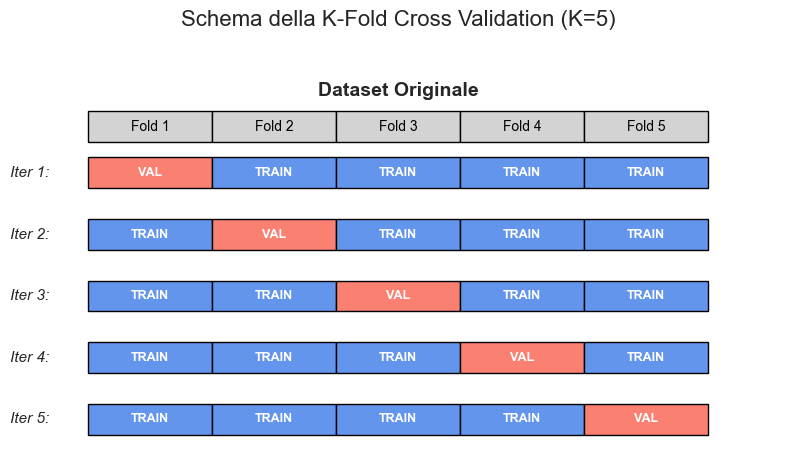

Plot 'k_fold_cross_validation.pdf' generato.

Generazione dei grafici sulla regolarizzazione...


/tmp/ipykernel_111655/2945536996.py:142: SyntaxWarning: invalid escape sequence '\l'
  f"Regressione Polinomiale (Grado {degree}) - Regolarizzazione Ridge ($\lambda={lambda_val}$)",


NameError: name 'Pipeline' is not defined

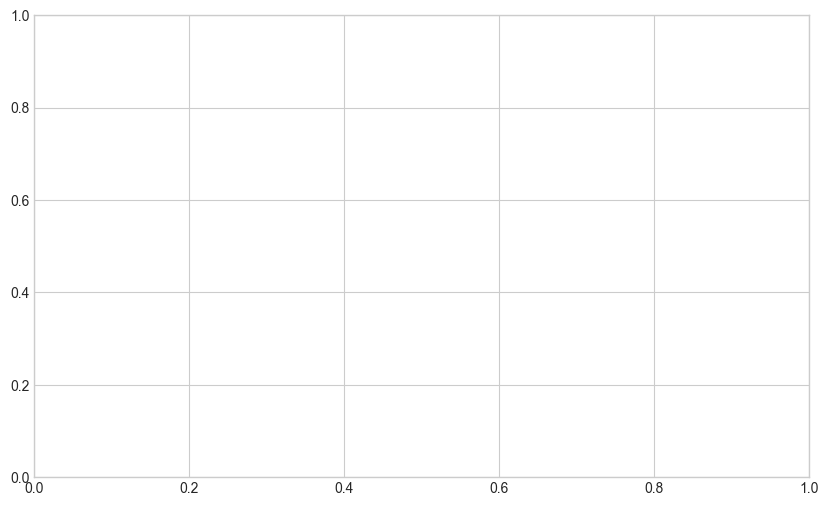

In [16]:

def generate_k_fold_diagram(k_folds=5):
    fig_height = k_folds * 0.5 + 2.5 
    fig, ax = plt.subplots(figsize=(10, fig_height))
    ax.axis('off') 

    dataset_width = 0.8
    dataset_height = 0.1
    fold_width = dataset_width / k_folds
    
    
    train_color = 'cornflowerblue'
    val_color = 'salmon'
    text_color = 'black'
    border_color = 'black'

    
    y_pos_dataset = 0.9
    ax.text(0.5, y_pos_dataset + dataset_height * 1.5, "Dataset Originale", 
            horizontalalignment='center', fontsize=14, fontweight='bold')
    
    for i in range(k_folds):
        rect = patches.Rectangle(
            (0.1 + i * fold_width, y_pos_dataset), fold_width, dataset_height,
            edgecolor=border_color, facecolor='lightgrey', linewidth=1
        )
        ax.add_patch(rect)
        ax.text(0.1 + i * fold_width + fold_width / 2, y_pos_dataset + dataset_height / 2,
                f"Fold {i+1}", horizontalalignment='center', verticalalignment='center',
                fontsize=10, color=text_color)

    
    y_pos_iterations_start = y_pos_dataset - dataset_height * 1.5
    iteration_step_y = dataset_height * 2.0 

    for k_iter in range(k_folds):
        current_y_pos = y_pos_iterations_start - k_iter * iteration_step_y
        ax.text(0.05, current_y_pos + dataset_height / 2, f"Iter {k_iter+1}:", 
                horizontalalignment='right', verticalalignment='center', fontsize=11, fontstyle='italic')

        for i in range(k_folds):
            is_validation_fold = (i == k_iter)
            rect_color = val_color if is_validation_fold else train_color
            
            rect = patches.Rectangle(
                (0.1 + i * fold_width, current_y_pos), fold_width, dataset_height,
                edgecolor=border_color, facecolor=rect_color, linewidth=1
            )
            ax.add_patch(rect)
            
            fold_label = "VAL" if is_validation_fold else "TRAIN"
            ax.text(0.1 + i * fold_width + fold_width / 2, current_y_pos + dataset_height / 2,
                    fold_label, horizontalalignment='center', verticalalignment='center',
                    fontsize=9, color='white' if rect_color != 'lightgrey' else text_color, fontweight='bold')
    
    ax.set_title("Schema della K-Fold Cross Validation (K=" + str(k_folds) + ")", fontsize=16, y=1.08) 
    ax.set_xlim(0, 1)
    ax.set_ylim(y_pos_iterations_start - (k_folds -1) * iteration_step_y - dataset_height * 0.5, 
                y_pos_dataset + dataset_height * 2.5)
    
    plt.savefig("k_fold_cross_validation.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'k_fold_cross_validation.pdf' generato.")




def generate_regularization_plots():
    np.random.seed(42)

    
    n_samples = 20
    noise_level = 0.1

    
    def true_func(X):
        return np.sin(2 * np.pi * X)

    X_data = np.sort(np.random.rand(n_samples))
    y_data = true_func(X_data) + np.random.normal(0, noise_level, n_samples)

    
    X_plot = np.linspace(0, 1, 200).reshape(-1, 1)

    
    degree = 50 
    
    
    def plot_model_fit(ax, X_actual, y_actual, X_line, y_line, title, model_label):
        ax.scatter(X_actual, y_actual, edgecolor='k', s=80, label='Dati Osservati', color='skyblue', alpha=0.8)
        ax.plot(X_line, y_line, color='red', linewidth=2.5, label=model_label)
        ax.plot(X_plot, true_func(X_plot.squeeze()), color='green', linestyle='--', linewidth=2, alpha=0.7, label='Funzione Reale')
        ax.set_title(title, fontsize=15)
        ax.set_xlabel("X", fontsize=12)
        ax.set_ylabel("y", fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=10)
        
        
        data_min = min(y_data.min(), true_func(X_plot.squeeze()).min())
        data_max = max(y_data.max(), true_func(X_plot.squeeze()).max())
        ax.set_ylim(data_min - 0.5, data_max + 0.5)


    
    fig_no_reg, ax_no_reg = plt.subplots(figsize=(10, 6))
    
    
    
    model_no_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()), 
        ("regressor", LinearRegression())
    ])
    
    model_no_reg.fit(X_data.reshape(-1, 1), y_data)
    y_pred_no_reg = model_no_reg.predict(X_plot)

    plot_model_fit(ax_no_reg, X_data, y_data, X_plot, y_pred_no_reg,
                   f"Regressione Polinomiale (Grado {degree}) - Senza Regolarizzazione",
                   "Modello (Non Regolarizzato)")
    
    plt.savefig("poly50_no_reg.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'poly50_no_reg.pdf' generato.")

    
    fig_with_reg, ax_with_reg = plt.subplots(figsize=(10, 6))
    
    lambda_val = 1.0 
    
    
    model_with_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()), 
        ("regressor", Ridge(alpha=lambda_val))
    ])
    
    model_with_reg.fit(X_data.reshape(-1, 1), y_data)
    y_pred_with_reg = model_with_reg.predict(X_plot)

    plot_model_fit(ax_with_reg, X_data, y_data, X_plot, y_pred_with_reg,
                   f"Regressione Polinomiale (Grado {degree}) - Regolarizzazione Ridge ($\lambda={lambda_val}$)",
                   "Modello (Regolarizzato con Ridge)")

    plt.savefig("poly50_with_reg.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'poly50_with_reg.pdf' generato.")



if __name__ == '__main__':
    print("Generazione del diagramma 'k_fold_cross_validation.pdf'...")
    generate_k_fold_diagram(k_folds=5) 
    print("\nGenerazione dei grafici sulla regolarizzazione...")
    generate_regularization_plots()

<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:78: SyntaxWarning: invalid escape sequence '\l'
<>:86: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:78: SyntaxWarning: invalid escape sequence '\l'
<>:86: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_93168/3367392696.py:61: SyntaxWarning: invalid escape sequence '\l'
  ax_ridge.set_xlabel("$\lambda$ (Forza di Regolarizzazione)", fontsize=14)
/tmp/ipykernel_93168/3367392696.py:78: SyntaxWarning: invalid escape sequence '\l'
  ax_lasso.set_xlabel("$\lambda$ (Forza di Regolarizzazione)", fontsize=14)
/tmp/ipykernel_93168/3367392696.py:86: SyntaxWarning: invalid escape sequence '\l'
  fig.suptitle("Andamento dei Coefficienti Standardizzati al Variare di $\lambda$", fontsize=18, y=1.02)


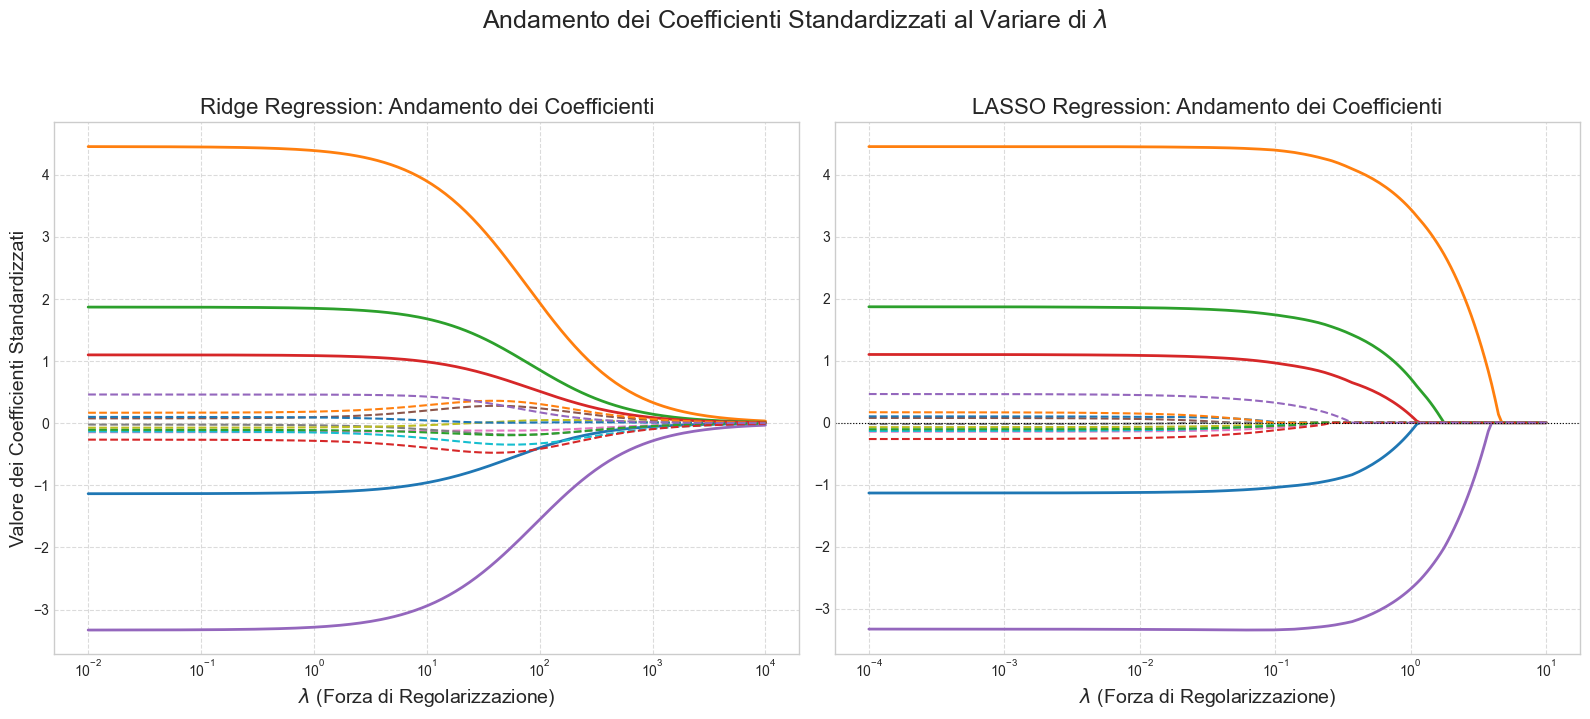

Plot 'ridge_vs_lasso_coeffs.pdf' generato.


In [ ]:

def generate_ridge_vs_lasso_coeffs_plot():
    np.random.seed(42)

    
    
    n_samples = 80
    n_features = 15 
    n_relevant_features = 5 

    
    true_coeffs = np.zeros(n_features)
    true_coeffs[:n_relevant_features] = np.random.uniform(-5, 5, n_relevant_features) 
    
    
    

    X = np.random.randn(n_samples, n_features)
    
    y = X @ true_coeffs + np.random.normal(0, 1.5, n_samples)

    
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    
    
    
    alphas_ridge = np.logspace(-2, 4, 200) 
    alphas_lasso = np.logspace(-4, 1, 200) 

    
    ridge_coeffs = []
    for alpha_r in alphas_ridge:
        ridge_model = Ridge(alpha=alpha_r, fit_intercept=True) 
        ridge_model.fit(X_scaled, y)
        ridge_coeffs.append(ridge_model.coef_)
    ridge_coeffs = np.array(ridge_coeffs)

    
    lasso_coeffs = []
    for alpha_l in alphas_lasso:
        
        lasso_model = Lasso(alpha=alpha_l, fit_intercept=True, max_iter=10000, tol=1e-3)
        lasso_model.fit(X_scaled, y)
        lasso_coeffs.append(lasso_model.coef_)
    lasso_coeffs = np.array(lasso_coeffs)
    
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 7), sharey=False) 

    
    ax_ridge = axs[0]
    for i in range(n_features):
        line_style = '-' if true_coeffs[i] != 0 else '--' 
        line_width = 2 if true_coeffs[i] != 0 else 1.5
        ax_ridge.plot(alphas_ridge, ridge_coeffs[:, i], linestyle=line_style, linewidth=line_width, 
                      label=f'$\\theta_{{{i+1}}}$' if n_features <= 10 else None) 

    ax_ridge.set_xscale('log')
    ax_ridge.set_xlabel("$\lambda$ (Forza di Regolarizzazione)", fontsize=14)
    ax_ridge.set_ylabel("Valore dei Coefficienti Standardizzati", fontsize=14)
    ax_ridge.set_title("Ridge Regression: Andamento dei Coefficienti", fontsize=16)
    ax_ridge.grid(True, linestyle='--', alpha=0.7)
    
    if n_features <= 10 : ax_ridge.legend(fontsize=9, loc='upper right', title="Coefficienti")


    
    ax_lasso = axs[1]
    for i in range(n_features):
        line_style = '-' if true_coeffs[i] != 0 else '--'
        line_width = 2 if true_coeffs[i] != 0 else 1.5
        ax_lasso.plot(alphas_lasso, lasso_coeffs[:, i], linestyle=line_style, linewidth=line_width,
                      label=f'$\\theta_{{{i+1}}}$' if n_features <= 10 else None)

    ax_lasso.set_xscale('log')
    ax_lasso.set_xlabel("$\lambda$ (Forza di Regolarizzazione)", fontsize=14)
    
    ax_lasso.set_title("LASSO Regression: Andamento dei Coefficienti", fontsize=16)
    ax_lasso.grid(True, linestyle='--', alpha=0.7)
    ax_lasso.axhline(0, color='black', linestyle=':', linewidth=0.8) 
    if n_features <= 10 : ax_lasso.legend(fontsize=9, loc='upper right', title="Coefficienti")


    fig.suptitle("Andamento dei Coefficienti Standardizzati al Variare di $\lambda$", fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.97]) 
    plt.savefig("ridge_vs_lasso_coeffs.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'ridge_vs_lasso_coeffs.pdf' generato.")



if __name__ == '__main__':
    generate_ridge_vs_lasso_coeffs_plot()

Generazione del grafico 'long_tail_graph.pdf'...


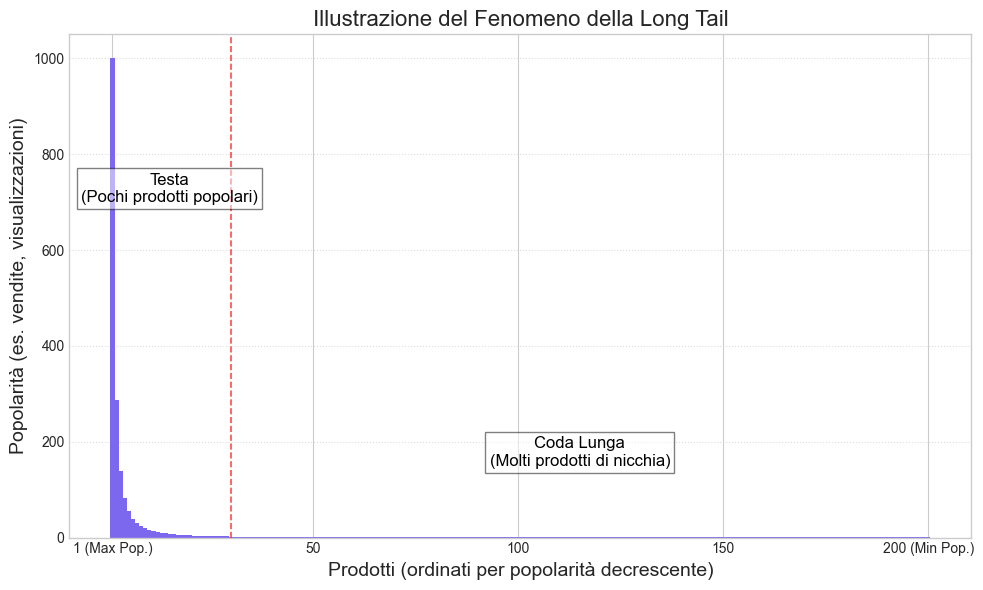

Plot 'long_tail_graph.pdf' generato.

Generazione del grafico 'utility_matrix_example.pdf'...


/tmp/ipykernel_93168/328307817.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdYlGn", 5)


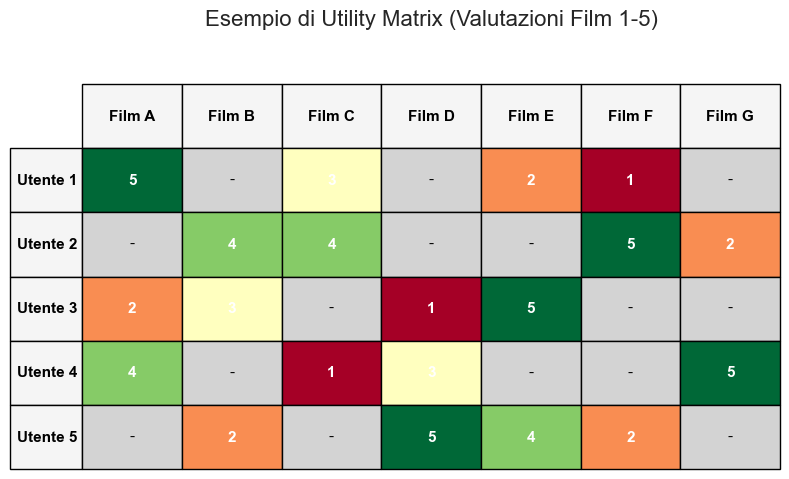

Plot 'utility_matrix_example.pdf' generato.


In [ ]:

def generate_long_tail_plot():
    np.random.seed(42) 

    
    
    a = 1.8 
    num_items = 200 
    
    
    
    
    ranks = np.arange(1, num_items + 1)
    popularities = (1 / ranks**a) * 1000  
    popularities = np.sort(popularities)[::-1] 
    
    
    popularities = np.maximum(popularities, 1) 

    plt.figure(figsize=(10, 6))
    
    
    plt.bar(ranks, popularities, color='mediumslateblue', width=1.0)

    plt.xlabel("Prodotti (ordinati per popolarità decrescente)", fontsize=14)
    plt.ylabel("Popolarità (es. vendite, visualizzazioni)", fontsize=14)
    plt.title("Illustrazione del Fenomeno della Long Tail", fontsize=16)
    
    
    
    
    plt.xticks([1, num_items // 4, num_items // 2, 3 * num_items // 4, num_items], 
               ['1 (Max Pop.)', f'{num_items // 4}', f'{num_items // 2}', f'{3 * num_items // 4}', f'{num_items} (Min Pop.)'])
    
    
    head_limit_rank = int(num_items * 0.15) 
    
    
    plt.axvline(head_limit_rank, color='red', linestyle='--', linewidth=1.2, alpha=0.7)
    
    max_pop_for_annotation = popularities[0]
    
    plt.text(head_limit_rank / 2, max_pop_for_annotation * 0.7, 'Testa\n(Pochi prodotti popolari)', 
             horizontalalignment='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5, pad=3))
    plt.text(head_limit_rank + (num_items - head_limit_rank) / 2, max_pop_for_annotation * 0.15, 
             'Coda Lunga\n(Molti prodotti di nicchia)', 
             horizontalalignment='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5, pad=3))
             
    plt.grid(True, axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    
    plt.savefig("long_tail_graph.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'long_tail_graph.pdf' generato.")




def generate_utility_matrix_plot():
    
    users = [f"Utente {i+1}" for i in range(5)] 
    items = [f"Film {chr(65+i)}" for i in range(7)] 

    
    
    utility_data = np.array([
        [5, np.nan, 3, np.nan, 2, 1, np.nan],
        [np.nan, 4, 4, np.nan, np.nan, 5, 2],
        [2, 3, np.nan, 1, 5, np.nan, np.nan],
        [4, np.nan, 1, 3, np.nan, np.nan, 5],
        [np.nan, 2, np.nan, 5, 4, 2, np.nan]
    ])

    fig, ax = plt.subplots(figsize=(9, 5)) 
    ax.axis('off') 

    
    cell_text = []
    for row in utility_data:
        cell_text.append([f'{x:.0f}' if not np.isnan(x) else '-' for x in row])

    
    
    cmap = plt.cm.get_cmap("RdYlGn", 5) 
    norm = mcolors.Normalize(vmin=1, vmax=5)
    
    cell_colours = np.full(utility_data.shape, 'lightgrey', dtype=object) 
    for i in range(utility_data.shape[0]):
        for j in range(utility_data.shape[1]):
            if not np.isnan(utility_data[i,j]):
                cell_colours[i,j] = cmap(norm(utility_data[i,j]))


    table = ax.table(cellText=cell_text,
                     rowLabels=users,
                     colLabels=items,
                     cellColours=cell_colours,
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1]) 

    table.auto_set_font_size(False)
    table.set_fontsize(11)
    
    
    for (i, j), cell in table.get_celld().items():
        cell.set_height(0.15) 
        cell.set_text_props(color='black' if cell_text[i-1][j] == '-' or i==0 else 'white', 
                            weight='bold' if cell_text[i-1][j] != '-' and i > 0 else 'normal')
        if i==0 or j==-1: 
            cell.set_text_props(weight='bold', color='black')
            cell.set_facecolor('whitesmoke') 


    ax.set_title("Esempio di Utility Matrix (Valutazioni Film 1-5)", fontsize=16, y=1.08, pad=20)
    
    plt.savefig("utility_matrix_example.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'utility_matrix_example.pdf' generato.")



if __name__ == '__main__':
    print("Generazione del grafico 'long_tail_graph.pdf'...")
    generate_long_tail_plot()
    print("\nGenerazione del grafico 'utility_matrix_example.pdf'...")
    generate_utility_matrix_plot()

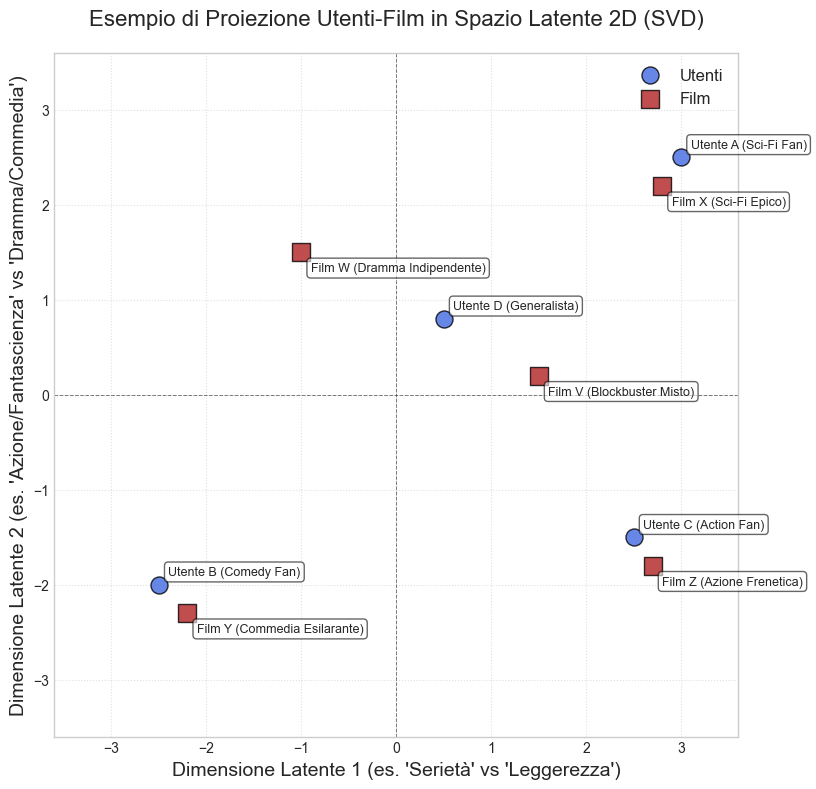

Plot 'svd_projection_example.pdf' generato.


In [ ]:

def generate_svd_projection_plot():
    np.random.seed(42) 

    
    
    

    
    users = {
        "Utente A (Sci-Fi Fan)": np.array([3, 2.5]),
        "Utente B (Comedy Fan)": np.array([-2.5, -2]),
        "Utente C (Action Fan)": np.array([2.5, -1.5]),
        "Utente D (Generalista)": np.array([0.5, 0.8])
    }
    user_names = list(users.keys())
    user_coords = np.array(list(users.values()))

    
    items = {
        "Film X (Sci-Fi Epico)": np.array([2.8, 2.2]),
        "Film Y (Commedia Esilarante)": np.array([-2.2, -2.3]),
        "Film Z (Azione Frenetica)": np.array([2.7, -1.8]),
        "Film W (Dramma Indipendente)": np.array([-1, 1.5]), 
        "Film V (Blockbuster Misto)": np.array([1.5, 0.2])
    }
    item_names = list(items.keys())
    item_coords = np.array(list(items.values()))

    
    plt.figure(figsize=(11, 8)) 

    
    plt.scatter(user_coords[:, 0], user_coords[:, 1], marker='o', s=150, 
                color='royalblue', alpha=0.8, label='Utenti', edgecolors='black')
    for i, name in enumerate(user_names):
        plt.text(user_coords[i, 0] + 0.1, user_coords[i, 1] + 0.1, name, fontsize=9, 
                 bbox=dict(facecolor='white', alpha=0.6, pad=1, boxstyle='round,pad=0.3'))

    
    plt.scatter(item_coords[:, 0], item_coords[:, 1], marker='s', s=150, 
                color='firebrick', alpha=0.8, label='Film', edgecolors='black')
    for i, name in enumerate(item_names):
        plt.text(item_coords[i, 0] + 0.1, item_coords[i, 1] - 0.2, name, fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.6, pad=1, boxstyle='round,pad=0.3'))
                 
    
    
    
    
    
    
    


    
    plt.title("Esempio di Proiezione Utenti-Film in Spazio Latente 2D (SVD)", fontsize=16, pad=20)
    plt.xlabel("Dimensione Latente 1 (es. 'Serietà' vs 'Leggerezza')", fontsize=14) 
    plt.ylabel("Dimensione Latente 2 (es. 'Azione/Fantascienza' vs 'Dramma/Commedia')", fontsize=14) 
    
    
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7, alpha=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.7, alpha=0.5)
    plt.grid(True, linestyle=':', alpha=0.6)
    
    
    all_coords = np.vstack((user_coords, item_coords))
    max_abs_val = np.max(np.abs(all_coords)) * 1.2 
    plt.xlim(-max_abs_val, max_abs_val)
    plt.ylim(-max_abs_val, max_abs_val)
    
    plt.legend(fontsize=12, loc='upper right')
    plt.gca().set_aspect('equal', adjustable='box') 

    plt.tight_layout()
    plt.savefig("svd_projection_example.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'svd_projection_example.pdf' generato.")


if __name__ == '__main__':
    generate_svd_projection_plot()

Generazione del grafico 'cell_classification_scatter.pdf'...


<>:104: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:104: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_93168/1886162186.py:104: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.2, 0.45, "$\sigma(0)=0.5$", fontsize=12)
/tmp/ipykernel_93168/1886162186.py:107: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma(t) = \\frac{1}{1 + e^{-t}}$", fontsize=14)


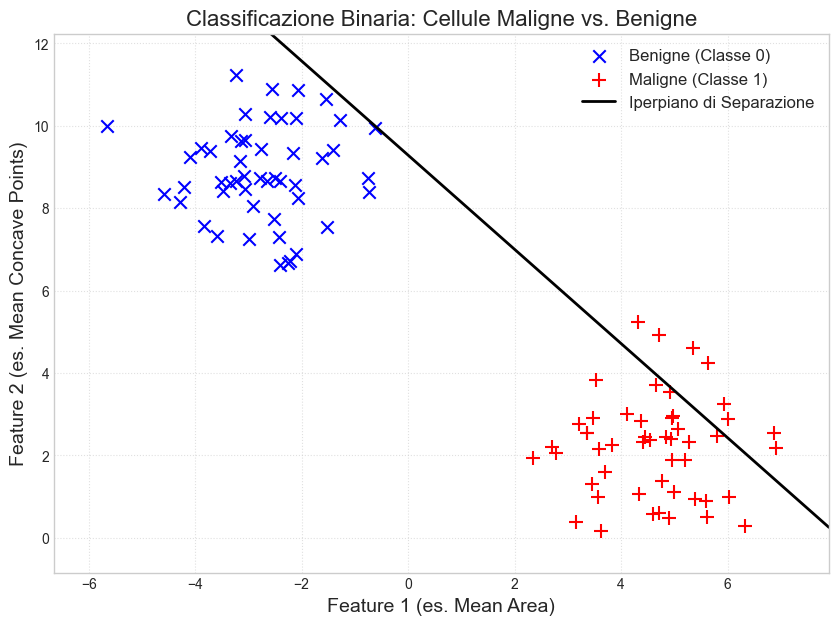

Plot 'cell_classification_scatter.pdf' generato.

Generazione del diagramma 'hyperplane_separation.pdf'...


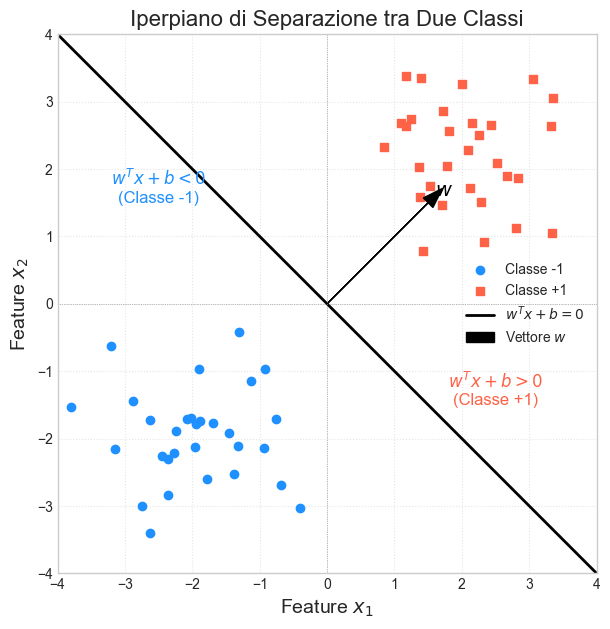

Plot 'hyperplane_separation.pdf' generato.

Generazione del grafico 'sigmoid_function.pdf'...


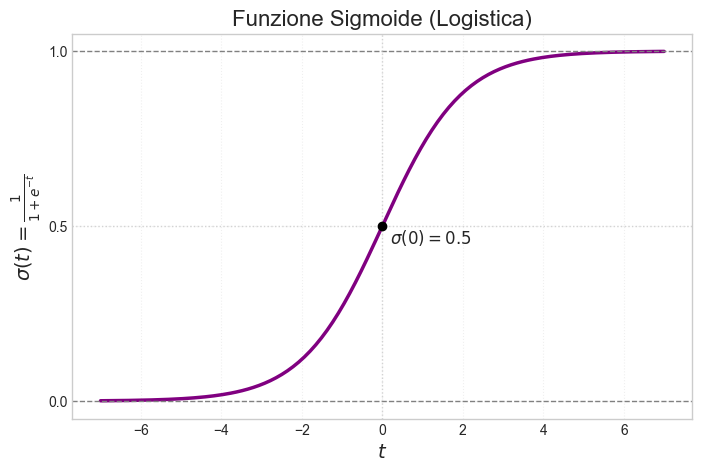

Plot 'sigmoid_function.pdf' generato.

Generazione del grafico 'nonlinear_data_transformation.pdf'...


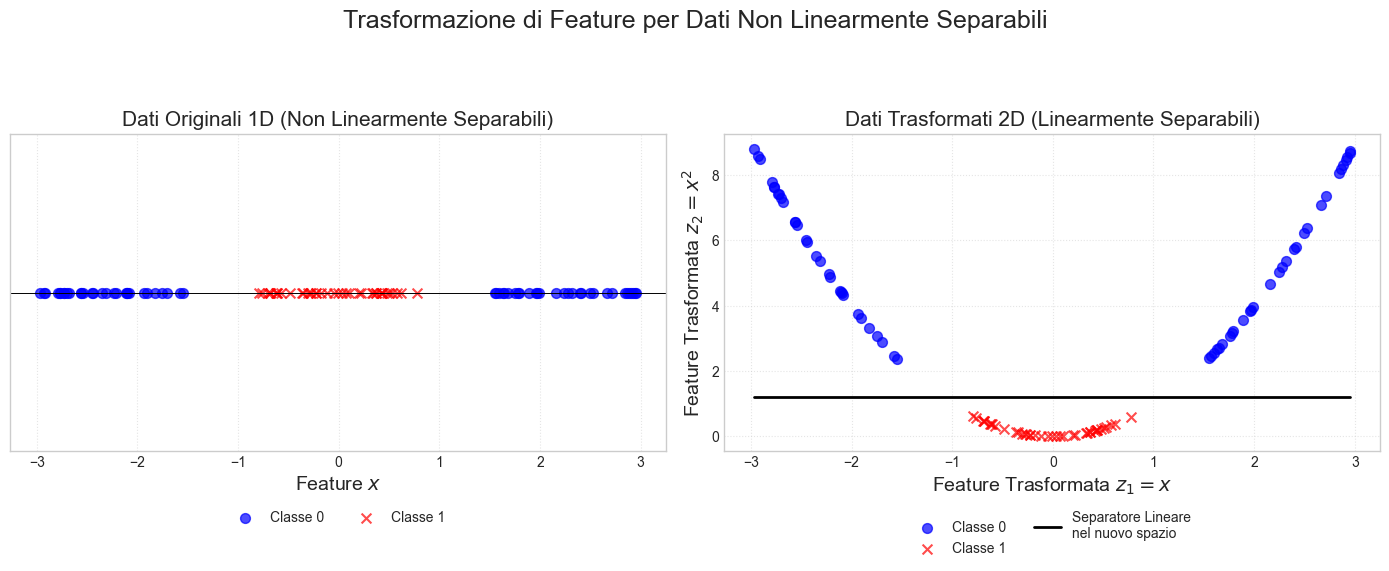

Plot 'nonlinear_data_transformation.pdf' generato.


In [ ]:

def generate_cell_classification_scatter_plot():
    np.random.seed(42)
    
    
    
    X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.2,
                      n_features=2)

    
    if X[y == 0, 0].mean() > X[y == 1, 0].mean(): 
        y = 1 - y 
        
    plt.figure(figsize=(10, 7))
    
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='x', s=80, label='Benigne (Classe 0)')
    
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='+', s=100, label='Maligne (Classe 1)')

    
    x_line = np.linspace(X[:, 0].min() -1 , X[:, 0].max() + 1, 100)
    
    
    
    w1, w2, b = 0.8, 0.7, -6.5 
    
    
    
    
    

    y_line = (-w1 * x_line - b) / w2
    plt.plot(x_line, y_line, color='black', linestyle='-', linewidth=2, label='Iperpiano di Separazione')

    plt.xlabel("Feature 1 (es. Mean Area)", fontsize=14)
    plt.ylabel("Feature 2 (es. Mean Concave Points)", fontsize=14)
    plt.title("Classificazione Binaria: Cellule Maligne vs. Benigne", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    
    plt.savefig("cell_classification_scatter.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'cell_classification_scatter.pdf' generato.")



def generate_hyperplane_separation_diagram():
    np.random.seed(0)
    
    class1_points = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], 30)
    class2_points = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], 30)

    plt.figure(figsize=(8, 7))
    
    plt.scatter(class1_points[:, 0], class1_points[:, 1], color='dodgerblue', marker='o', label='Classe -1')
    plt.scatter(class2_points[:, 0], class2_points[:, 1], color='tomato', marker='s', label='Classe +1')

    
    w = np.array([1, 1])
    b = 0
    x_hyperplane = np.linspace(-4, 4, 100)
    y_hyperplane = (-w[0] * x_hyperplane - b) / w[1]
    plt.plot(x_hyperplane, y_hyperplane, 'k-', linewidth=2, label='$w^T x + b = 0$')

    arrow_start_x, arrow_start_y = 0,0 
    plt.arrow(arrow_start_x, arrow_start_y, w[0]*1.5, w[1]*1.5, head_width=0.2, head_length=0.3, fc='black', ec='black', label='Vettore $w$')
    plt.text(w[0]*1.5 + arrow_start_x + 0.1, w[1]*1.5 + arrow_start_y + 0.1, '$w$', fontsize=14, color='black')

    plt.text(2.5, -1.5, "$w^T x + b > 0$\n(Classe +1)", fontsize=12, horizontalalignment='center', color='tomato')
    plt.text(-2.5, 1.5, "$w^T x + b < 0$\n(Classe -1)", fontsize=12, horizontalalignment='center', color='dodgerblue')
    
    plt.xlabel("Feature $x_1$", fontsize=14)
    plt.ylabel("Feature $x_2$", fontsize=14)
    plt.title("Iperpiano di Separazione tra Due Classi", fontsize=16)
    plt.axhline(0, color='gray', linestyle=':', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle=':', linewidth=0.5)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.savefig("hyperplane_separation.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'hyperplane_separation.pdf' generato.")



def generate_sigmoid_function_plot():
    t = np.linspace(-7, 7, 200)
    sigma_t = 1 / (1 + np.exp(-t))

    plt.figure(figsize=(8, 5))
    plt.plot(t, sigma_t, color='purple', linewidth=2.5)

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.axhline(1, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0.5, color='lightgray', linestyle=':', linewidth=1)
    plt.axvline(0, color='lightgray', linestyle=':', linewidth=1)
    
    plt.plot(0, 0.5, 'ko') 
    plt.text(0.2, 0.45, "$\sigma(0)=0.5$", fontsize=12)

    plt.xlabel("$t$", fontsize=14)
    plt.ylabel("$\sigma(t) = \\frac{1}{1 + e^{-t}}$", fontsize=14)
    plt.title("Funzione Sigmoide (Logistica)", fontsize=16)
    plt.yticks([0, 0.5, 1.0])
    plt.grid(True, linestyle=':', alpha=0.3)
    
    plt.savefig("sigmoid_function.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'sigmoid_function.pdf' generato.")



def generate_nonlinear_data_transformation_plot():
    np.random.seed(42)
    
    
    
    X0_group1 = np.random.uniform(-3, -1.5, 30)
    X0_group2 = np.random.uniform(1.5, 3, 30)
    X1_group = np.random.uniform(-0.8, 0.8, 40) 
    
    X_1d = np.concatenate([X0_group1, X0_group2, X1_group])
    
    y_1d = np.concatenate([np.zeros(len(X0_group1) + len(X0_group2)), np.ones(len(X1_group))])

    
    X_transformed = np.vstack([X_1d, X_1d**2]).T

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    
    axs[0].scatter(X_1d[y_1d==0], np.zeros_like(X_1d[y_1d==0]), 
                   color='blue', marker='o', s=50, label='Classe 0', alpha=0.7) 
    axs[0].scatter(X_1d[y_1d==1], np.zeros_like(X_1d[y_1d==1]), 
                   color='red', marker='x', s=50, label='Classe 1', alpha=0.7)
    axs[0].set_yticks([]) 
    axs[0].set_xlabel("Feature $x$", fontsize=14)
    axs[0].set_title("Dati Originali 1D (Non Linearmente Separabili)", fontsize=15)
    axs[0].axhline(0, color='black', lw=0.7) 
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2) 
    axs[0].grid(True, axis='x', linestyle=':', alpha=0.5)
    axs[0].set_ylim(-0.1, 0.1) 


    
    axs[1].scatter(X_transformed[y_1d==0, 0], X_transformed[y_1d==0, 1], 
                   color='blue', marker='o', s=50, label='Classe 0', alpha=0.7)
    axs[1].scatter(X_transformed[y_1d==1, 0], X_transformed[y_1d==1, 1], 
                   color='red', marker='x', s=50, label='Classe 1', alpha=0.7)
    
    
    
    
    
    boundary_x_sq_val = 1.2 
    line_x_transformed = np.linspace(X_transformed[:,0].min(), X_transformed[:,0].max(), 100)
    line_y_transformed = np.full_like(line_x_transformed, boundary_x_sq_val)
    axs[1].plot(line_x_transformed, line_y_transformed, 'k-', linewidth=2, label='Separatore Lineare\nnel nuovo spazio')

    axs[1].set_xlabel("Feature Trasformata $z_1 = x$", fontsize=14)
    axs[1].set_ylabel("Feature Trasformata $z_2 = x^2$", fontsize=14)
    axs[1].set_title("Dati Trasformati 2D (Linearmente Separabili)", fontsize=15)
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2) 
    axs[1].grid(True, linestyle=':', alpha=0.5)

    fig.suptitle("Trasformazione di Feature per Dati Non Linearmente Separabili", fontsize=18, y=1.03)
    plt.tight_layout(rect=[0,0.05,1,0.95]) 
    plt.savefig("nonlinear_data_transformation.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'nonlinear_data_transformation.pdf' generato.")


if __name__ == '__main__':
    print("Generazione del grafico 'cell_classification_scatter.pdf'...")
    generate_cell_classification_scatter_plot()
    print("\nGenerazione del diagramma 'hyperplane_separation.pdf'...")
    generate_hyperplane_separation_diagram()
    print("\nGenerazione del grafico 'sigmoid_function.pdf'...")
    generate_sigmoid_function_plot()
    print("\nGenerazione del grafico 'nonlinear_data_transformation.pdf'...")
    generate_nonlinear_data_transformation_plot()

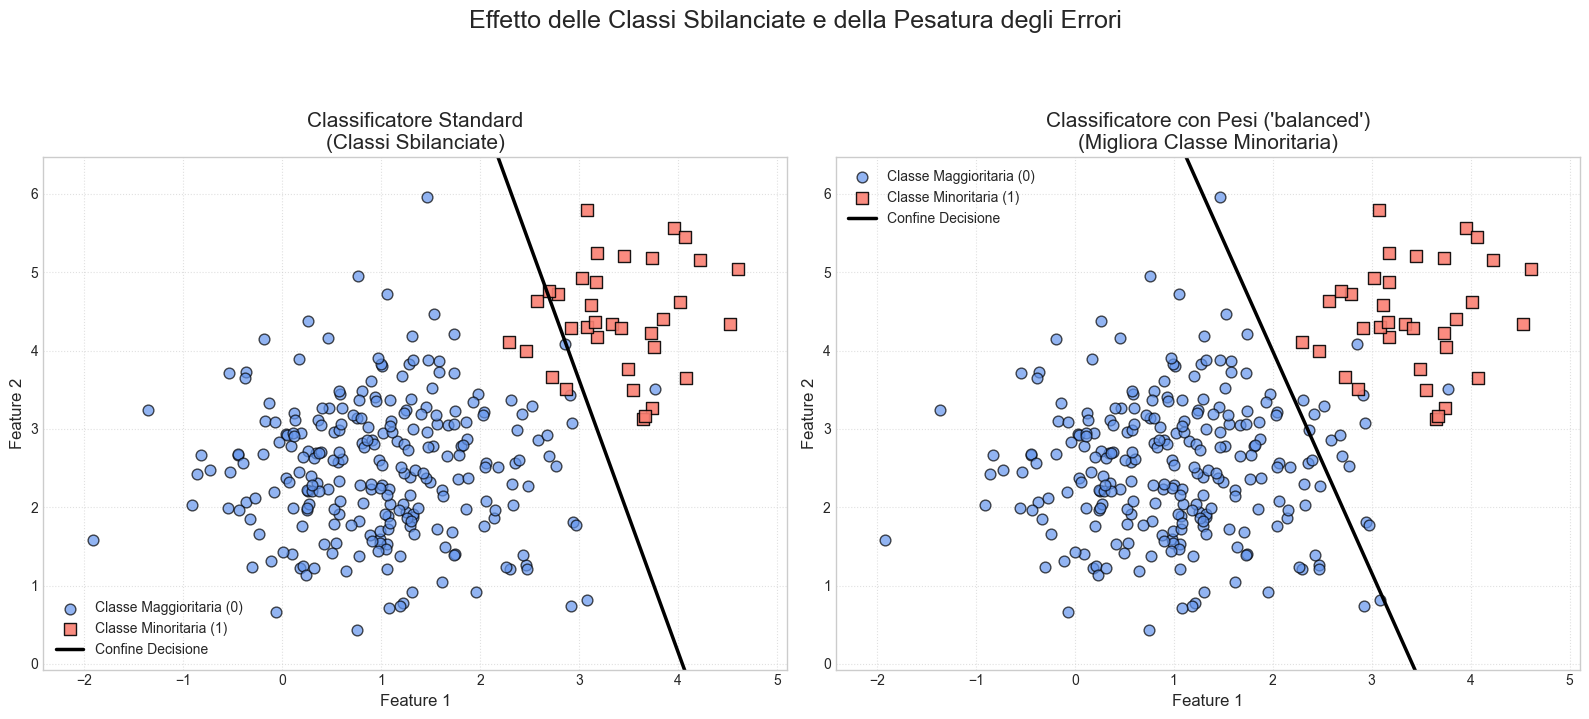

Plot 'imbalanced_classes.pdf' generato.


In [ ]:


def plot_linear_decision_boundary_and_data(ax, X, y, classifier, title, is_weighted):
    
    
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='cornflowerblue', edgecolors='k', 
               marker='o', s=60, label='Classe Maggioritaria (0)', alpha=0.7)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='salmon', edgecolors='k', 
               marker='s', s=70, label='Classe Minoritaria (1)', alpha=0.9)

    
    w = classifier.coef_[0]
    b = classifier.intercept_[0]

    
    xlim = ax.get_xlim()
    x_vals = np.array(xlim)
    
    
    
    if abs(w[1]) > 1e-5: 
        y_vals = (-w[0] * x_vals - b) / w[1]
        ax.plot(x_vals, y_vals, color='black', linestyle='-', linewidth=2.5, label="Confine Decisione")
    elif abs(w[0]) > 1e-5: 
        x_boundary = -b / w[0]
        ax.axvline(x_boundary, color='black', linestyle='-', linewidth=2.5, label="Confine Decisione")
    

    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.legend(fontsize=10, loc='lower left' if not is_weighted else 'best') 
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_xlim(xlim) 
    


def generate_imbalanced_classes_plot():
    np.random.seed(43) 

    
    
    n_majority = 250
    n_minority = 35
    
    
    centers = [[1, 2.5], [3.5, 4.5]] 
    cluster_std = [0.9, 0.7] 

    X_maj, _ = make_blobs(n_samples=n_majority, centers=[centers[0]], 
                           cluster_std=cluster_std[0], random_state=42, n_features=2)
    y_maj = np.zeros(n_majority, dtype=int) 

    X_min, _ = make_blobs(n_samples=n_minority, centers=[centers[1]], 
                           cluster_std=cluster_std[1], random_state=42, n_features=2)
    y_min = np.ones(n_minority, dtype=int) 
    
    X = np.vstack((X_maj, X_min))
    y = np.concatenate((y_maj, y_min))

    
    fig, axs = plt.subplots(1, 2, figsize=(16, 7)) 

    
    std_classifier = LogisticRegression(solver='liblinear', random_state=42)
    std_classifier.fit(X, y)
    
    
    axs[0].set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    axs[0].set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    plot_linear_decision_boundary_and_data(axs[0], X, y, std_classifier, 
                                           "Classificatore Standard\n(Classi Sbilanciate)", is_weighted=False)

    
    
    weighted_classifier = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
    
    
    
    weighted_classifier.fit(X, y)

    
    axs[1].set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    axs[1].set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    plot_linear_decision_boundary_and_data(axs[1], X, y, weighted_classifier,
                                           "Classificatore con Pesi ('balanced')\n(Migliora Classe Minoritaria)", is_weighted=True)

    fig.suptitle("Effetto delle Classi Sbilanciate e della Pesatura degli Errori", fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.savefig("imbalanced_classes.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'imbalanced_classes.pdf' generato.")



if __name__ == '__main__':
    generate_imbalanced_classes_plot()

Generazione del grafico 'max_margin_hyperplane.pdf'...


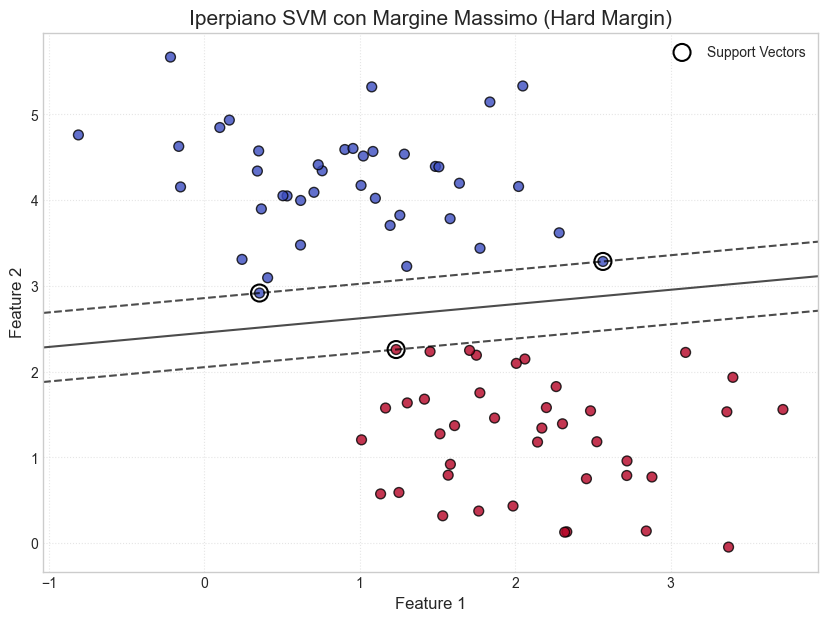

Plot 'max_margin_hyperplane.pdf' generato.

Generazione del grafico 'soft_margin_svm.pdf'...


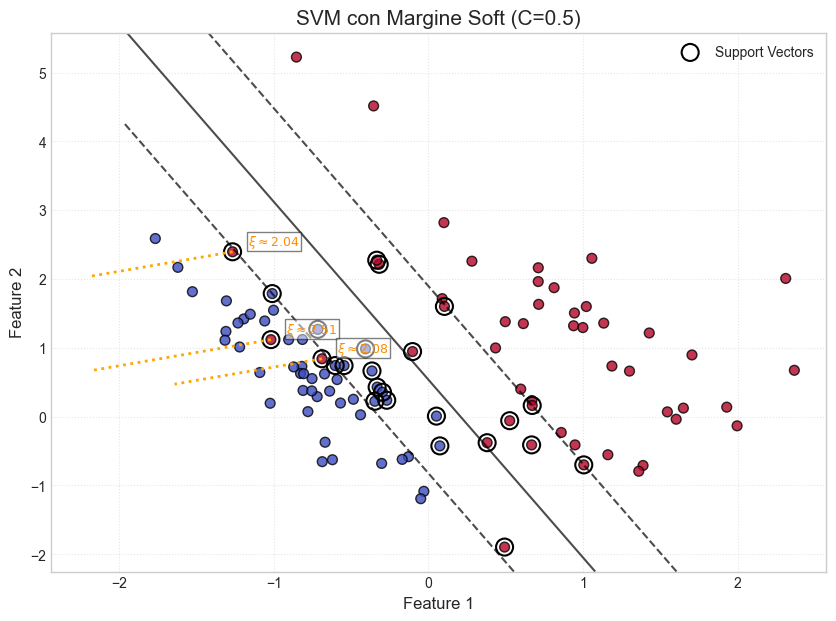

Plot 'soft_margin_svm.pdf' generato.


In [ ]:


def plot_svm_visual(ax, clf, X, y, title, show_slack=False, C_param=None):
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.8)

    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])
    
    
    sv = clf.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k', 
               linewidths=1.5, label='Support Vectors')

    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, linestyle=':', alpha=0.5)

    
    if show_slack:
        
        w = clf.coef_[0]
        b = clf.intercept_[0]
        norm_w = np.linalg.norm(w)

        
        
        
        
        
        points_to_annotate = []
        for i, sv_point in enumerate(sv):
            
            decision_val = clf.decision_function(sv_point.reshape(1, -1))[0]
            
            
            sv_original_index = clf.support_[i]
            sv_label = y[sv_original_index] 

            margin_val = sv_label * decision_val 
            xi = max(0, 1 - margin_val)

            if xi > 1e-4: 
                points_to_annotate.append((sv_point, xi, sv_label, decision_val))
        
        
        points_to_annotate.sort(key=lambda p: p[1], reverse=True) 
        
        for i, (point, slack_val, point_label, dec_val) in enumerate(points_to_annotate[:3]): 
            
            
            
            
            
            
            
            
            
            
            
            
            

            
            
            if point_label * dec_val < 1 - 1e-4:
                 ax.plot([point[0], point[0] - point_label * w[0] * slack_val / (norm_w**2 + 1e-9)],
                         [point[1], point[1] - point_label * w[1] * slack_val / (norm_w**2 + 1e-9)],
                         linestyle=':', color='orange', lw=2)
                 ax.text(point[0] + 0.1, point[1] + 0.1, f"$\\xi \\approx {slack_val:.2f}$", 
                         fontsize=9, color='darkorange', bbox=dict(facecolor='white', alpha=0.5, pad=1))




def generate_max_margin_plot():
    np.random.seed(0)
    
    X, y = make_blobs(n_samples=80, centers=2, random_state=0, cluster_std=0.7)

    
    
    clf_hard = SVC(kernel='linear', C=1000) 
    clf_hard.fit(X, y)

    fig_hard, ax_hard = plt.subplots(figsize=(10, 7))
    plot_svm_visual(ax_hard, clf_hard, X, y, 
                    "Iperpiano SVM con Margine Massimo (Hard Margin)", 
                    show_slack=False)
    
    plt.savefig("max_margin_hyperplane.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'max_margin_hyperplane.pdf' generato.")




def generate_soft_margin_plot():
    np.random.seed(1)
    
    
    
    X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                               random_state=2, n_clusters_per_class=1, class_sep=0.8)


    
    C_param = 0.5 
    clf_soft = SVC(kernel='linear', C=C_param)
    clf_soft.fit(X, y)

    fig_soft, ax_soft = plt.subplots(figsize=(10, 7))
    plot_svm_visual(ax_soft, clf_soft, X, y,
                    f"SVM con Margine Soft (C={C_param})",
                    show_slack=True, C_param=C_param)
    
    plt.savefig("soft_margin_svm.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'soft_margin_svm.pdf' generato.")



if __name__ == '__main__':
    print("Generazione del grafico 'max_margin_hyperplane.pdf'...")
    generate_max_margin_plot()
    print("\nGenerazione del grafico 'soft_margin_svm.pdf'...")
    generate_soft_margin_plot()

Generazione del grafico 'svm_kernel_examples.pdf'...


<>:44: SyntaxWarning: invalid escape sequence '\g'
<>:45: SyntaxWarning: invalid escape sequence '\g'
<>:98: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:100: SyntaxWarning: invalid escape sequence '\g'
<>:44: SyntaxWarning: invalid escape sequence '\g'
<>:45: SyntaxWarning: invalid escape sequence '\g'
<>:98: SyntaxWarning: invalid escape sequence '\l'
<>:99: SyntaxWarning: invalid escape sequence '\l'
<>:100: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_93168/1720718075.py:44: SyntaxWarning: invalid escape sequence '\g'
  (SVC(kernel='rbf', C=C_val, gamma=0.1), "Kernel RBF ($\gamma=0.1$)"),
/tmp/ipykernel_93168/1720718075.py:45: SyntaxWarning: invalid escape sequence '\g'
  (SVC(kernel='rbf', C=C_val, gamma=5), "Kernel RBF ($\gamma=5$)")
/tmp/ipykernel_93168/1720718075.py:98: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\log_{10}(C)$", fontsize=14)
/tmp/ipykernel_93168/1720718075.py:99: SyntaxWarning: in

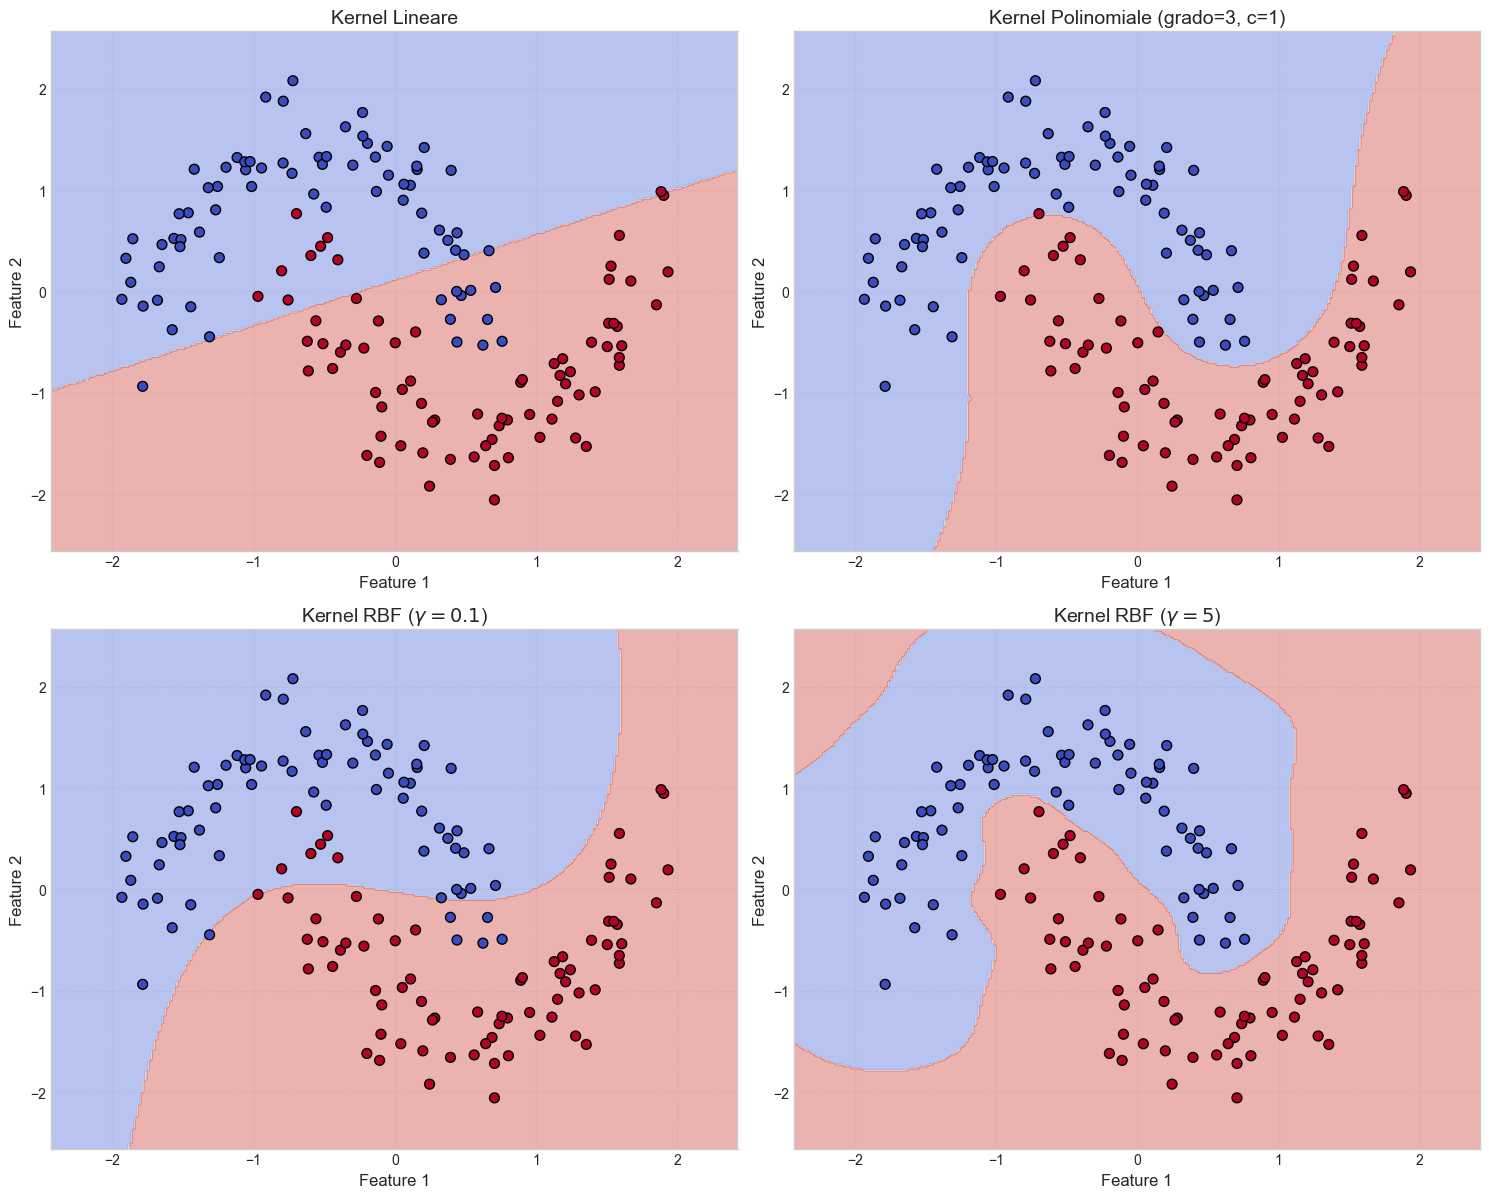

Plot 'svm_kernel_examples.pdf' generato.

Generazione del grafico 'svm_c_gamma_heatmap.pdf'...
Migliori parametri trovati: {'C': np.float64(1.0), 'gamma': np.float64(0.1)}
Migliore accuratezza (CV): 0.980


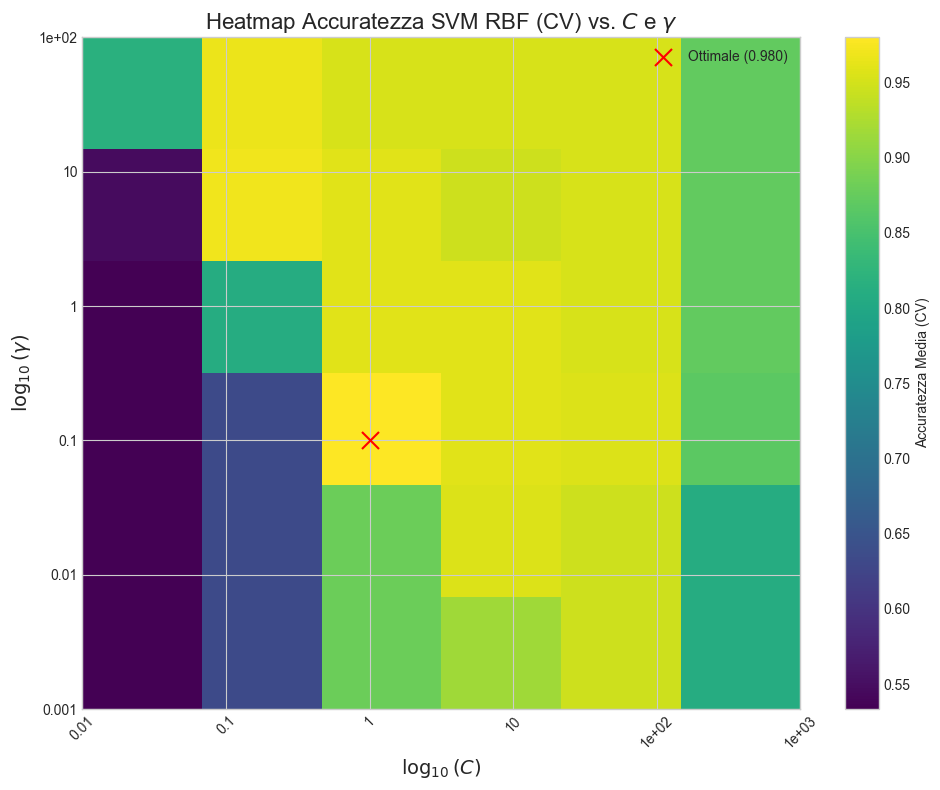

Plot 'svm_c_gamma_heatmap.pdf' generato.


In [ ]:

def plot_svm_decision_boundary_generic(ax, clf, X, y, title, h=0.02):
    
    
    
    
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())



def generate_svm_kernel_examples_plot():
    np.random.seed(42)
    
    X, y = make_moons(n_samples=150, noise=0.15, random_state=42)
    
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    
    C_val = 10.0 
    
    models = [
        (SVC(kernel='linear', C=C_val), "Kernel Lineare"),
        (SVC(kernel='poly', degree=3, C=C_val, gamma='scale', coef0=1), "Kernel Polinomiale (grado=3, c=1)"), 
        (SVC(kernel='rbf', C=C_val, gamma=0.1), "Kernel RBF ($\gamma=0.1$)"), 
        (SVC(kernel='rbf', C=C_val, gamma=5), "Kernel RBF ($\gamma=5$)")    
    ]

    fig, axs = plt.subplots(2, 2, figsize=(15, 13))
    axs = axs.flatten()

    for i, (clf, title) in enumerate(models):
        clf.fit(X_scaled, y)
        plot_svm_decision_boundary_generic(axs[i], clf, X_scaled, y, title)
        

    plt.tight_layout(rect=[0, 0, 1, 0.93]) 
    plt.savefig("svm_kernel_examples.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'svm_kernel_examples.pdf' generato.")



def generate_svm_c_gamma_heatmap_plot():
    np.random.seed(42)
    
    X, y = make_circles(n_samples=300, noise=0.12, factor=0.5, random_state=42)
    
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    
    

    
    C_range = np.logspace(-2, 3, 6)    
    gamma_range = np.logspace(-3, 2, 6) 

    param_grid = {'C': C_range, 'gamma': gamma_range}
    
    
    
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, y) 

    print(f"Migliori parametri trovati: {grid_search.best_params_}")
    print(f"Migliore accuratezza (CV): {grid_search.best_score_:.3f}")

    
    scores = grid_search.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

    
    plt.figure(figsize=(10, 8))
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.viridis, aspect='auto',
               origin='lower', extent=[np.log10(C_range[0]), np.log10(C_range[-1]), 
                                       np.log10(gamma_range[0]), np.log10(gamma_range[-1])])
    
    plt.xlabel("$\log_{10}(C)$", fontsize=14)
    plt.ylabel("$\log_{10}(\gamma)$", fontsize=14)
    plt.title("Heatmap Accuratezza SVM RBF (CV) vs. $C$ e $\gamma$", fontsize=16)
    
    
    plt.xticks(np.log10(C_range), [f"{c:.2g}" for c in C_range], rotation=45)
    plt.yticks(np.log10(gamma_range), [f"{g:.2g}" for g in gamma_range])

    plt.colorbar(label='Accuratezza Media (CV)')

    
    best_c_log = np.log10(grid_search.best_params_['C'])
    best_gamma_log = np.log10(grid_search.best_params_['gamma'])
    plt.scatter([best_c_log], [best_gamma_log], marker='x', s=150, color='red', label=f'Ottimale ({grid_search.best_score_:.3f})')
    plt.legend(fontsize=10)

    plt.tight_layout()
    plt.savefig("svm_c_gamma_heatmap.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'svm_c_gamma_heatmap.pdf' generato.")



if __name__ == '__main__':
    print("Generazione del grafico 'svm_kernel_examples.pdf'...")
    generate_svm_kernel_examples_plot()
    print("\nGenerazione del grafico 'svm_c_gamma_heatmap.pdf'...")
    generate_svm_c_gamma_heatmap_plot()

Generazione del diagramma 'regression_tree_example.pdf'...


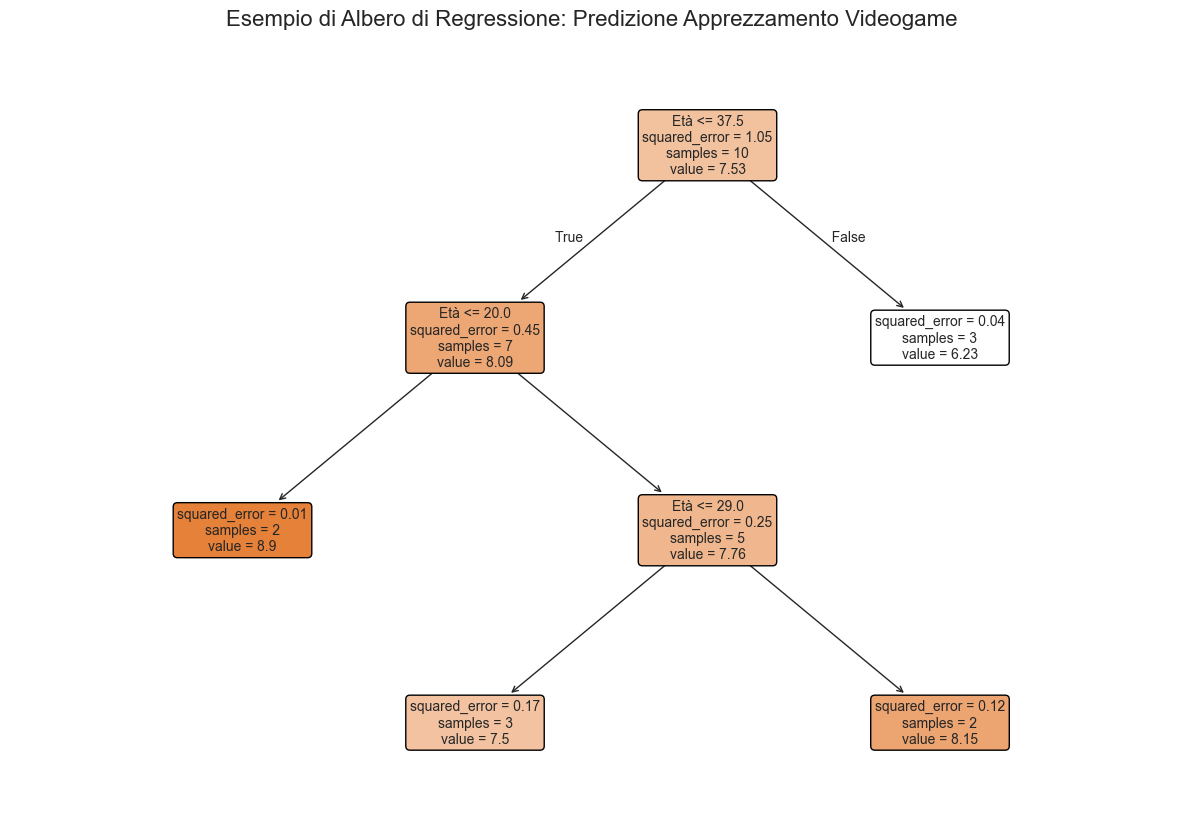

Plot 'regression_tree_example.pdf' generato.

Generazione del grafico 'feature_space_partitioning.pdf'...


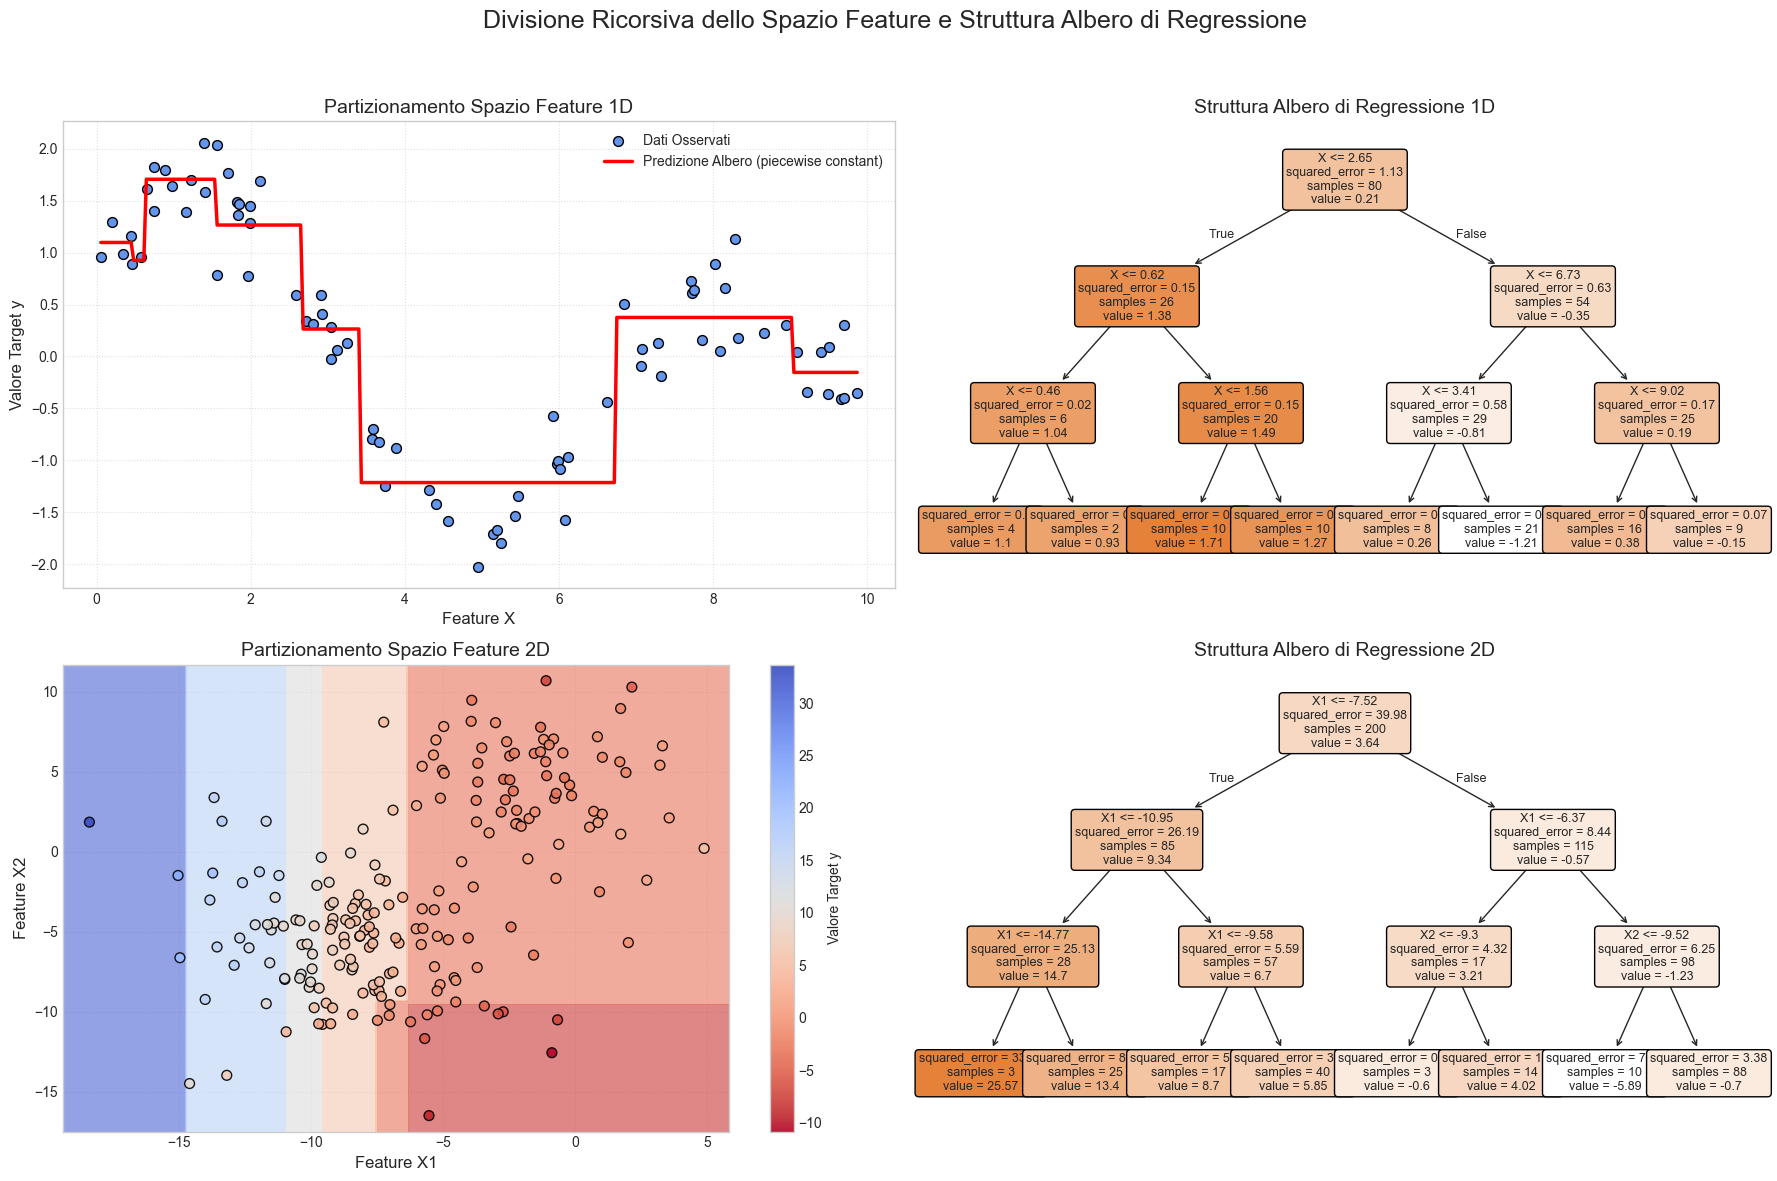

Plot 'feature_space_partitioning.pdf' generato.


In [ ]:


def generate_regression_tree_diagram():
    
    
    data = {
        'Età': [25, 40, 22, 35, 15, 50, 28, 18, 45, 30],
        'Genere_str': ['Maschio', 'Maschio', 'Femmina', 'Femmina', 'Maschio', 
                       'Femmina', 'Femmina', 'Maschio', 'Maschio', 'Femmina'],
        'Apprezzamento': [8.0, 6.5, 7.0, 8.5, 9.0, 6.0, 7.5, 8.8, 6.2, 7.8]
    }
    df = pd.DataFrame(data)

    
    label_encoder = LabelEncoder()
    df['Genere'] = label_encoder.fit_transform(df['Genere_str']) 

    X = df[['Età', 'Genere']]
    y = df['Apprezzamento']
    feature_names = ['Età', 'Genere (0=M, 1=F)'] 

    
    
    tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42, min_samples_leaf=2)
    tree_reg.fit(X, y)

    
    plt.figure(figsize=(15, 10)) 
    plot_tree(tree_reg, 
              feature_names=feature_names,
              filled=True, 
              rounded=True,
              impurity=True, 
              precision=2,   
              node_ids=False, 
              proportion=False, 
              fontsize=10)     
    
    plt.title("Esempio di Albero di Regressione: Predizione Apprezzamento Videogame", fontsize=16, y=1.02)
    plt.savefig("regression_tree_example.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'regression_tree_example.pdf' generato.")




def generate_feature_space_partitioning_plots():
    np.random.seed(42)
    fig = plt.figure(figsize=(18, 12)) 
    
    
    
    X_1d = np.sort(np.random.rand(80) * 10).reshape(-1, 1)
    y_1d = np.sin(X_1d).ravel() + np.cos(X_1d*0.5).ravel() * 0.8 + np.random.randn(80) * 0.3
    
    
    tree_1d = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_1d.fit(X_1d, y_1d)
    
    
    ax1_fs = fig.add_subplot(2, 2, 1)
    X_1d_plot = np.linspace(X_1d.min(), X_1d.max(), 300).reshape(-1, 1)
    y_1d_pred_plot = tree_1d.predict(X_1d_plot)
    
    ax1_fs.scatter(X_1d, y_1d, s=50, edgecolor="black", c="cornflowerblue", label="Dati Osservati")
    ax1_fs.plot(X_1d_plot, y_1d_pred_plot, color="red", label="Predizione Albero (piecewise constant)", linewidth=2.5)
    ax1_fs.set_xlabel("Feature X", fontsize=12)
    ax1_fs.set_ylabel("Valore Target y", fontsize=12)
    ax1_fs.set_title("Partizionamento Spazio Feature 1D", fontsize=14)
    ax1_fs.legend(fontsize=10)
    ax1_fs.grid(True, linestyle=':', alpha=0.6)

    
    ax1_tree = fig.add_subplot(2, 2, 2)
    plot_tree(tree_1d, feature_names=["X"], filled=True, rounded=True, ax=ax1_tree, impurity=True, precision=2, fontsize=9)
    ax1_tree.set_title("Struttura Albero di Regressione 1D", fontsize=14)

    
    
    X_2d, y_2d = make_blobs(n_samples=200, centers=None, n_features=2, random_state=1, cluster_std=3.0)
    
    y_2d = (np.sin(X_2d[:, 0] * 0.5) + np.cos(X_2d[:, 1] * 0.8) * 2 + 
            0.1 * X_2d[:,0]**2 - 0.05 * X_2d[:,1]**2 + np.random.randn(200) * 0.5)


    
    tree_2d = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_2d.fit(X_2d, y_2d)

    
    ax2_fs = fig.add_subplot(2, 2, 3)
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = tree_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    contour = ax2_fs.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm_r) 
    scatter = ax2_fs.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, s=50, edgecolor='k', cmap=plt.cm.coolwarm_r, alpha=0.9)
    fig.colorbar(scatter, ax=ax2_fs, label='Valore Target y')
    
    ax2_fs.set_xlabel("Feature X1", fontsize=12)
    ax2_fs.set_ylabel("Feature X2", fontsize=12)
    ax2_fs.set_title("Partizionamento Spazio Feature 2D", fontsize=14)
    ax2_fs.grid(True, linestyle=':', alpha=0.6)

    
    ax2_tree = fig.add_subplot(2, 2, 4)
    plot_tree(tree_2d, feature_names=["X1", "X2"], filled=True, rounded=True, ax=ax2_tree, impurity=True, precision=2, fontsize=9)
    ax2_tree.set_title("Struttura Albero di Regressione 2D", fontsize=14)
    
    fig.suptitle("Divisione Ricorsiva dello Spazio Feature e Struttura Albero di Regressione", fontsize=18, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.savefig("feature_space_partitioning.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'feature_space_partitioning.pdf' generato.")


if __name__ == '__main__':
    print("Generazione del diagramma 'regression_tree_example.pdf'...")
    generate_regression_tree_diagram()
    print("\nGenerazione del grafico 'feature_space_partitioning.pdf'...")
    generate_feature_space_partitioning_plots()

Generazione del diagramma 'ensemble_tree_example.pdf'...


<>:124: SyntaxWarning: invalid escape sequence '\h'
<>:136: SyntaxWarning: invalid escape sequence '\h'
<>:124: SyntaxWarning: invalid escape sequence '\h'
<>:136: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_93168/3118036798.py:124: SyntaxWarning: invalid escape sequence '\h'
  ax_left.plot(X_gbm, y_pred_current, color="red", linewidth=2.3, label=f"$\hat{{y}}^{{({current_num_trees_added})}}$ (Pred. Combinata)")
/tmp/ipykernel_93168/3118036798.py:136: SyntaxWarning: invalid escape sequence '\h'
  ax_right.set_ylabel(f"Residui ($y - \hat{{y}}^{{({current_num_trees_added})}}$)", fontsize=10)


Plot 'ensemble_tree_example.pdf' generato.

Generazione del grafico 'gbm_iterations_example.pdf'...


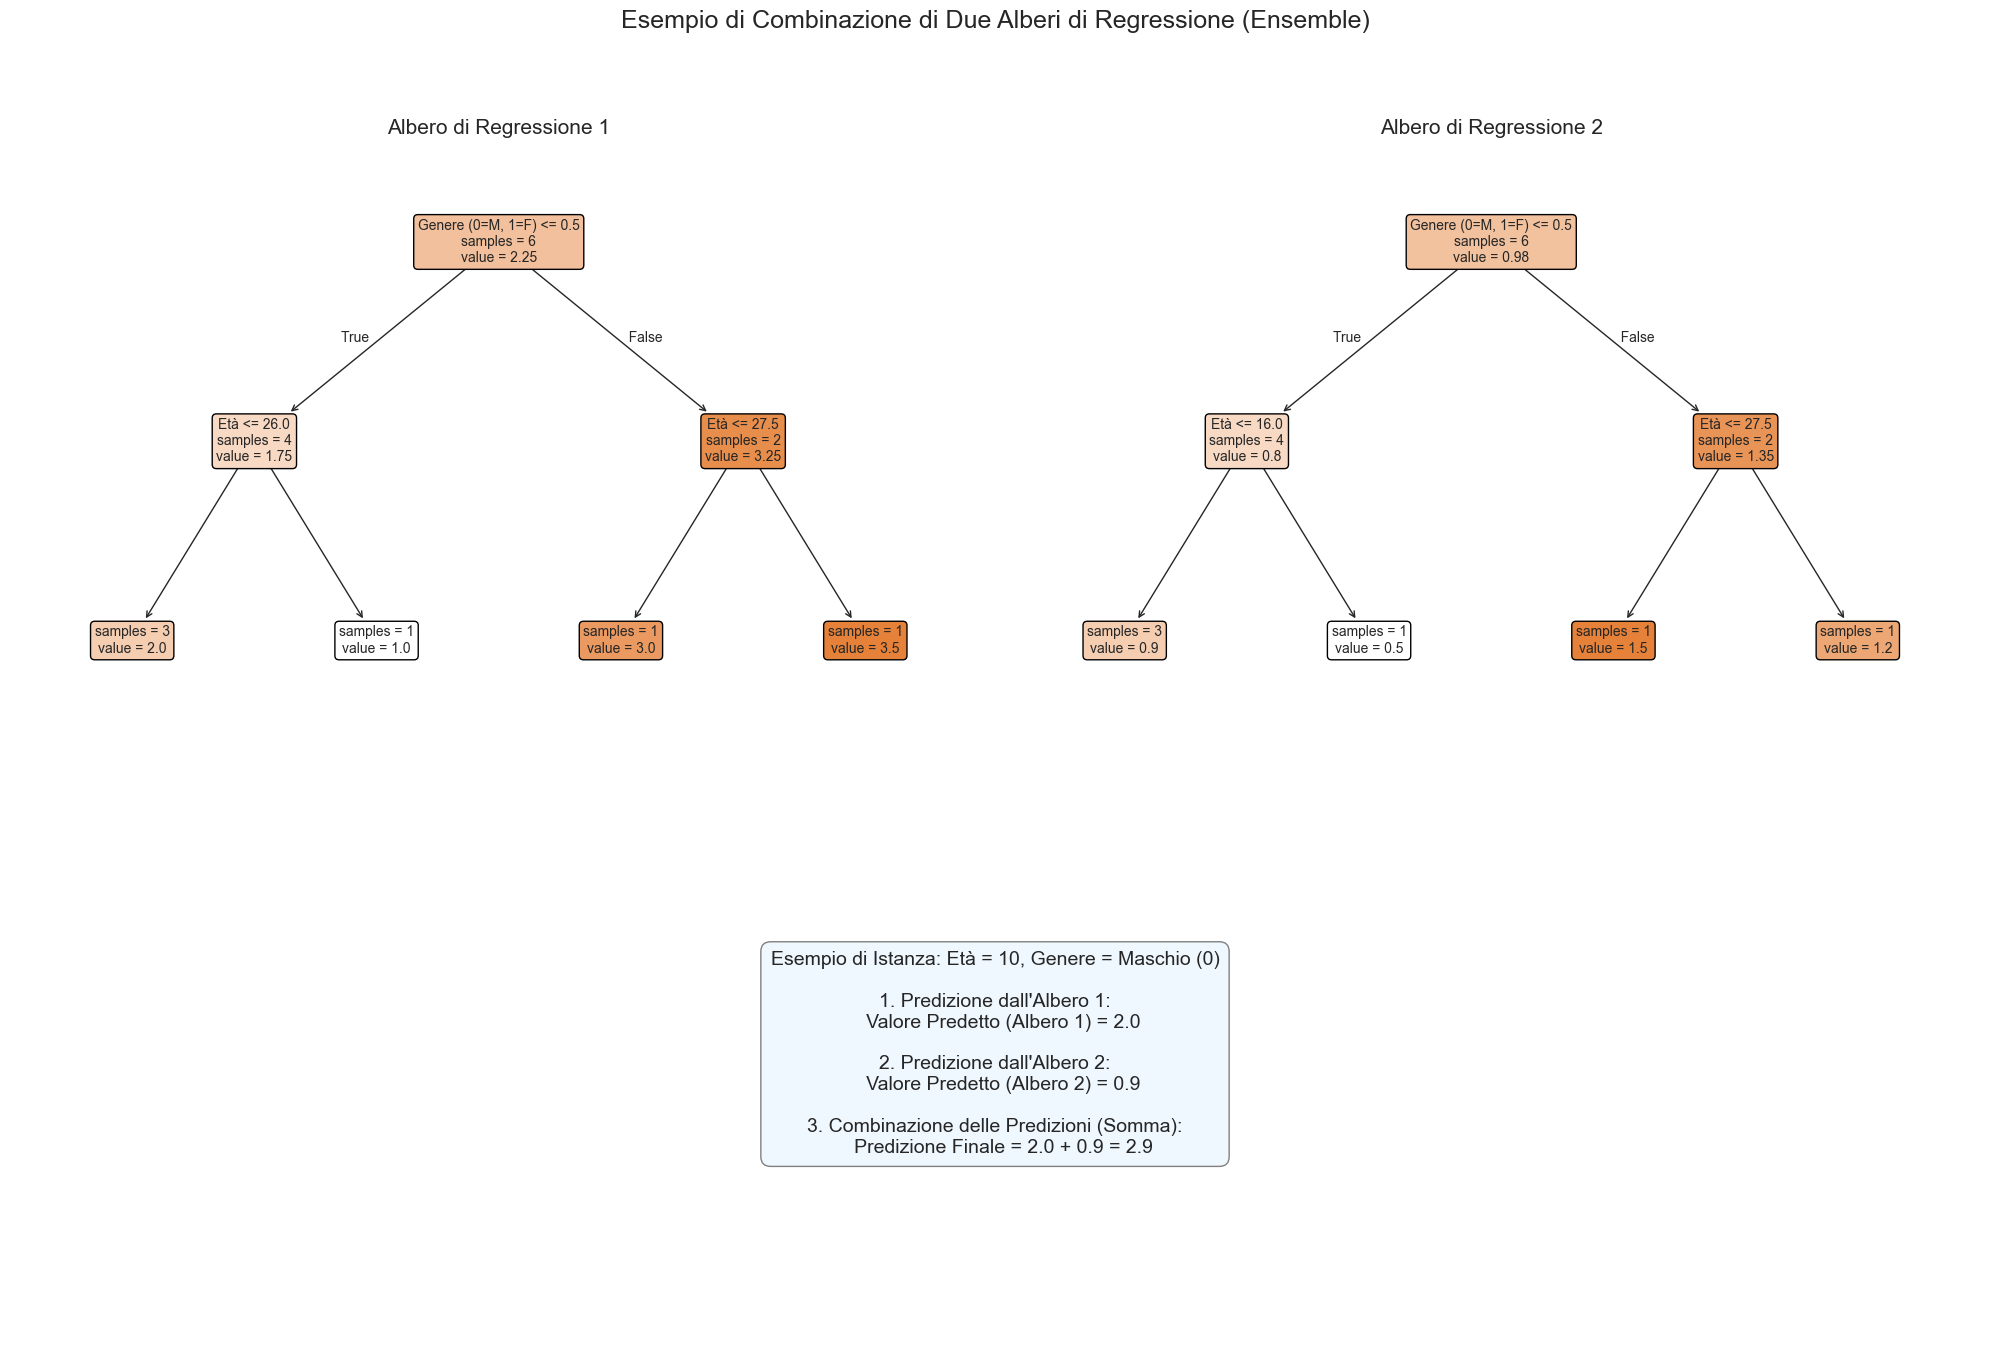

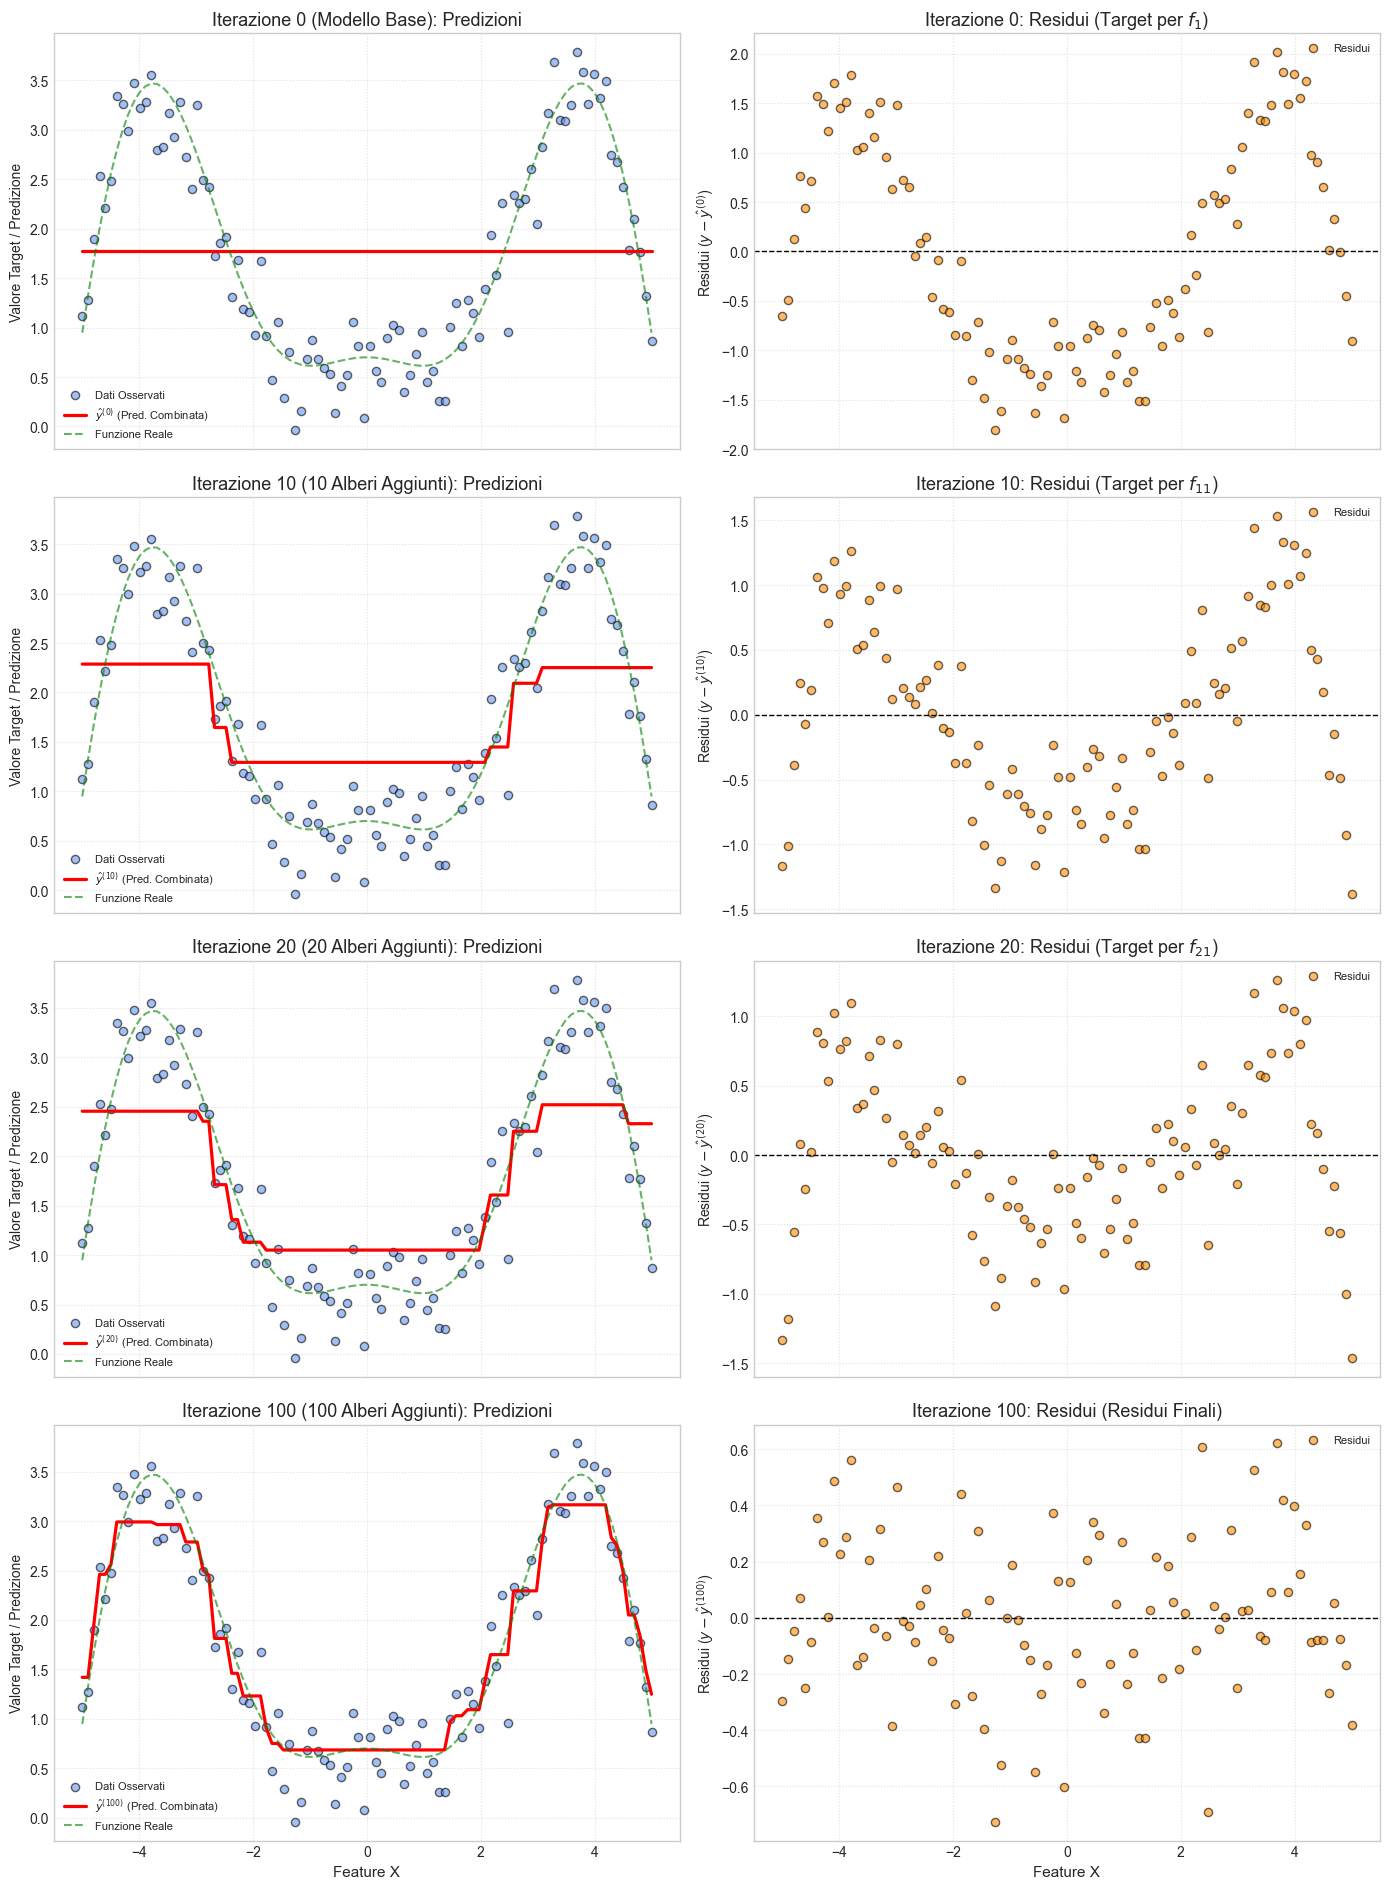

Plot 'gbm_iterations_example.pdf' generato con iterazioni selezionate (0, 10, 20, 100).


In [ ]:

plt.style.use('seaborn-v0_8-whitegrid')


def generate_ensemble_tree_example_plot():
    
    feature_names_ensemble = ['Età', 'Genere (0=M, 1=F)']

    
    data_tree1 = {
        'Età':        [10, 25, 12, 30, 8,  40],
        'Genere_str': ['M', 'F', 'M', 'F', 'M', 'M'], 
        'Target1':    [2.0, 3.0, 2.0, 3.5, 2.0, 1.0]
    }
    df_tree1 = pd.DataFrame(data_tree1)
    df_tree1['Genere'] = df_tree1['Genere_str'].apply(lambda x: 0 if x == 'M' else 1)
    X1 = df_tree1[['Età', 'Genere']]
    y1 = df_tree1['Target1']
    
    tree1 = DecisionTreeRegressor(max_depth=2, random_state=42, min_samples_leaf=1)
    tree1.fit(X1, y1)

    
    data_tree2 = {
        'Età':        [10, 25, 12, 30, 18, 14],
        'Genere_str': ['M', 'F', 'M', 'F', 'M', 'M'],
        'Target2':    [0.9, 1.5, 0.9, 1.2, 0.5, 0.9]
    }
    df_tree2 = pd.DataFrame(data_tree2)
    df_tree2['Genere'] = df_tree2['Genere_str'].apply(lambda x: 0 if x == 'M' else 1)
    X2 = df_tree2[['Età', 'Genere']]
    y2 = df_tree2['Target2']

    tree2 = DecisionTreeRegressor(max_depth=2, random_state=10, min_samples_leaf=1)
    tree2.fit(X2, y2)

    
    instance = pd.DataFrame({'Età': [10], 'Genere': [0]}) 
    
    pred_tree1 = tree1.predict(instance)[0]
    pred_tree2 = tree2.predict(instance)[0]
    final_pred = pred_tree1 + pred_tree2

    
    fig = plt.figure(figsize=(20, 14)) 

    ax1 = fig.add_subplot(2, 2, 1)
    plot_tree(tree1, feature_names=feature_names_ensemble, filled=True, rounded=True, ax=ax1,
              impurity=False, precision=2, fontsize=10, node_ids=False)
    ax1.set_title("Albero di Regressione 1", fontsize=15)

    ax2 = fig.add_subplot(2, 2, 2)
    plot_tree(tree2, feature_names=feature_names_ensemble, filled=True, rounded=True, ax=ax2,
              impurity=False, precision=2, fontsize=10, node_ids=False)
    ax2.set_title("Albero di Regressione 2", fontsize=15)
    
    ax_text = fig.add_subplot(2, 1, 2) 
    ax_text.axis('off') 
    
    text_content = (
        f"Esempio di Istanza: Età = {instance['Età'].iloc[0]}, Genere = Maschio (0)\n\n"
        f"1. Predizione dall'Albero 1:\n"
        f"   Valore Predetto (Albero 1) = {pred_tree1:.1f}\n\n"
        f"2. Predizione dall'Albero 2:\n"
        f"   Valore Predetto (Albero 2) = {pred_tree2:.1f}\n\n"
        f"3. Combinazione delle Predizioni (Somma):\n"
        f"   Predizione Finale = {pred_tree1:.1f} + {pred_tree2:.1f} = {final_pred:.1f}"
    )
    
    ax_text.text(0.5, 0.5, text_content,
                 horizontalalignment='center', verticalalignment='center', 
                 fontsize=14, bbox=dict(boxstyle="round,pad=0.5", fc="aliceblue", ec="grey"))

    fig.suptitle("Esempio di Combinazione di Due Alberi di Regressione (Ensemble)", fontsize=18, y=0.97)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.savefig("ensemble_tree_example.pdf", bbox_inches='tight')
    
    print("Plot 'ensemble_tree_example.pdf' generato.")




def generate_gbm_iterations_plot():
    np.random.seed(42)

    
    n_samples = 100
    X_gbm = np.linspace(-5, 5, n_samples).reshape(-1, 1)
    y_gbm_true = X_gbm.ravel() * np.sin(X_gbm.ravel() * 0.6) + np.cos(X_gbm.ravel()*1.5) * 0.7 
    y_gbm = y_gbm_true + np.random.normal(0, 0.35, n_samples)

    
    max_boosting_steps = 100  
    iterations_to_plot = [0, 10, 20, 100] 
    
    learning_rate = 0.2 
    max_depth_tree = 1  

    
    y_pred_current = np.full_like(y_gbm, np.mean(y_gbm)) 

    
    num_plot_rows = len(iterations_to_plot)
    fig, axs = plt.subplots(num_plot_rows, 2, 
                           figsize=(14, 5 * num_plot_rows), 
                           sharex='col')
    if num_plot_rows == 1: 
        axs = axs.reshape(1, -1)

    plot_row_idx = 0 

    
    for current_num_trees_added in range(max_boosting_steps + 1): 
        
        
        if current_num_trees_added in iterations_to_plot:
            if plot_row_idx >= num_plot_rows: 
                break 
            
            ax_left = axs[plot_row_idx, 0]
            ax_right = axs[plot_row_idx, 1]

            
            ax_left.scatter(X_gbm, y_gbm, s=35, edgecolor="black", c="cornflowerblue", alpha=0.6, label="Dati Osservati")
            ax_left.plot(X_gbm, y_pred_current, color="red", linewidth=2.3, label=f"$\hat{{y}}^{{({current_num_trees_added})}}$ (Pred. Combinata)")
            ax_left.plot(X_gbm, y_gbm_true, color="green", linestyle="--", linewidth=1.5, alpha=0.6, label="Funzione Reale")
            ax_left.set_ylabel("Valore Target / Predizione", fontsize=10)
            title_suffix = "(Modello Base)" if current_num_trees_added == 0 else f"({current_num_trees_added} Alberi Aggiunti)"
            ax_left.set_title(f"Iterazione {current_num_trees_added} {title_suffix}: Predizioni", fontsize=13)
            ax_left.legend(fontsize=8, loc='best')
            ax_left.grid(True, linestyle=':', alpha=0.6)

            
            residuals = y_gbm - y_pred_current
            ax_right.scatter(X_gbm, residuals, s=35, edgecolor="black", c="darkorange", alpha=0.6, label="Residui")
            ax_right.axhline(0, color='black', linestyle='--', linewidth=1)
            ax_right.set_ylabel(f"Residui ($y - \hat{{y}}^{{({current_num_trees_added})}}$)", fontsize=10)
            
            title_right_suffix = f"(Target per $f_{{{current_num_trees_added+1}}}$)" if current_num_trees_added < max_boosting_steps else "(Residui Finali)"
            ax_right.set_title(f"Iterazione {current_num_trees_added}: Residui {title_right_suffix}", fontsize=13)
            ax_right.legend(fontsize=8, loc='best')
            ax_right.grid(True, linestyle=':', alpha=0.6)

            if plot_row_idx == num_plot_rows - 1:
                ax_left.set_xlabel("Feature X", fontsize=11)
                ax_right.set_xlabel("Feature X", fontsize=11)
            
            plot_row_idx += 1

        
        if current_num_trees_added < max_boosting_steps:
            residuals_for_next_tree = y_gbm - y_pred_current 
            
            tree_booster = DecisionTreeRegressor(max_depth=max_depth_tree, random_state=42 + current_num_trees_added)
            tree_booster.fit(X_gbm, residuals_for_next_tree)
            
            f_t_x = tree_booster.predict(X_gbm)
            y_pred_current = y_pred_current + learning_rate * f_t_x 
    
    plt.tight_layout(rect=[0, 0.01, 1, 0.96])
    plt.savefig("gbm_iterations_example.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'gbm_iterations_example.pdf' generato con iterazioni selezionate (0, 10, 20, 100).")


if __name__ == '__main__':
    print("Generazione del diagramma 'ensemble_tree_example.pdf'...")
    generate_ensemble_tree_example_plot() 
    print("\nGenerazione del grafico 'gbm_iterations_example.pdf'...")
    generate_gbm_iterations_plot() 

Generazione del diagramma 'cosine_similarity_diagram.pdf'...


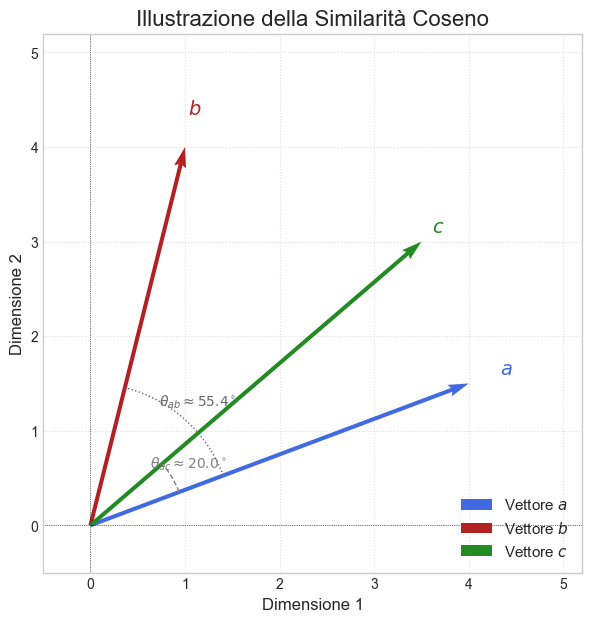

Plot 'cosine_similarity_diagram.pdf' generato.

Generazione del grafico 'wordnet_graph_example.pdf'...
PyGraphviz/Graphviz non trovato. Utilizzo 'spring_layout' per WordNet.


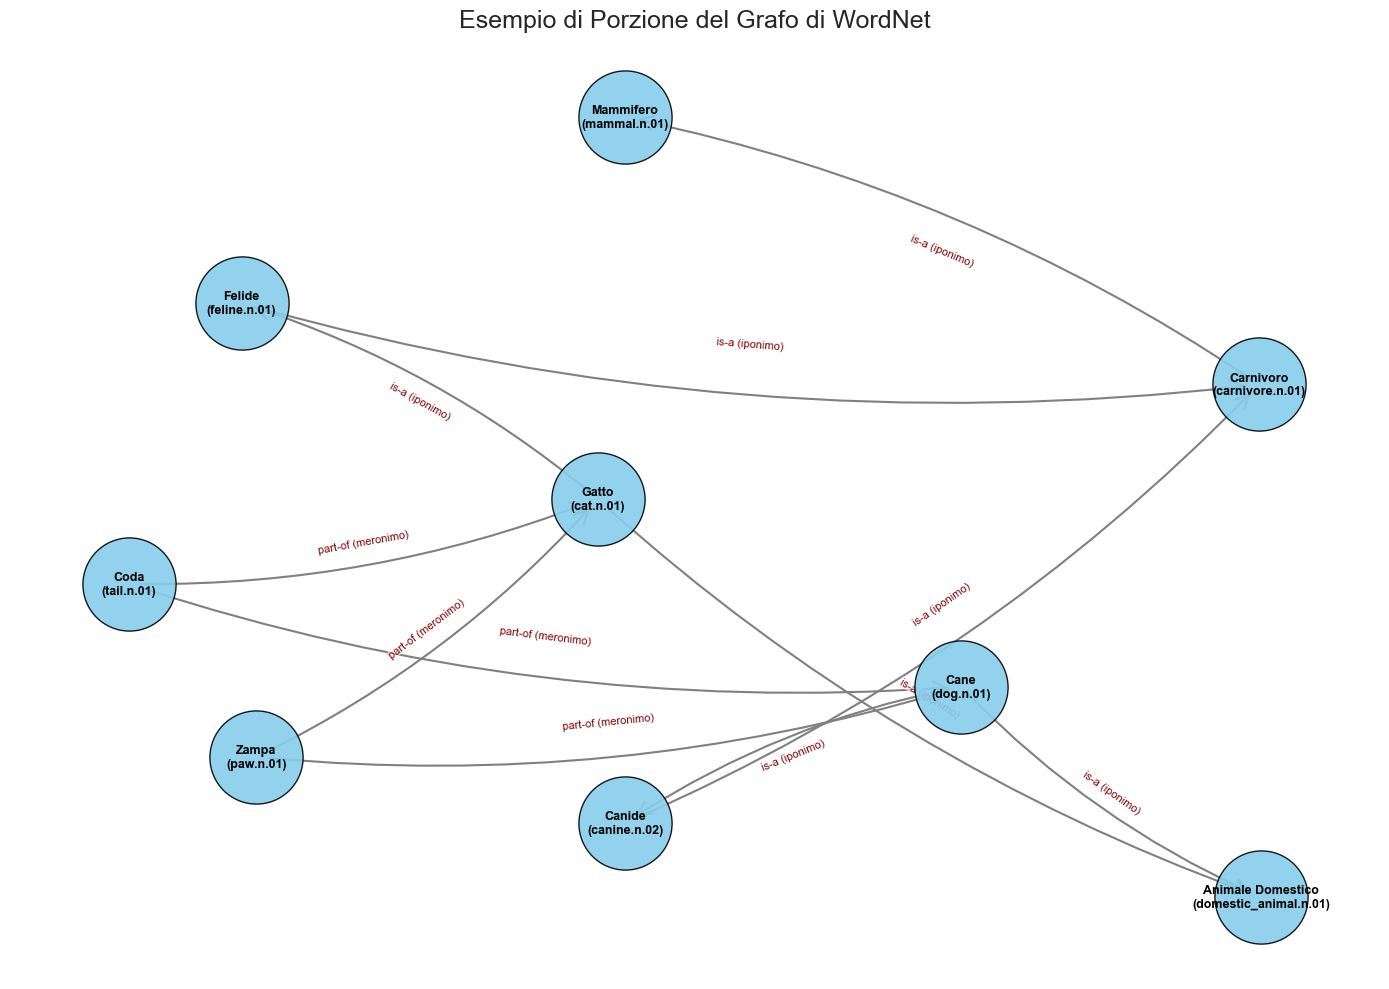

Plot 'wordnet_graph_example.pdf' generato.


In [ ]:

plt.style.use('seaborn-v0_8-whitegrid')



def generate_cosine_similarity_plot():
    
    origin = np.array([0, 0])
    vec_a = np.array([4, 1.5])
    vec_c = np.array([3.5, 3])  
    vec_b = np.array([1, 4])    

    
    def cos_sim_and_angle(v1, v2):
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        if norm_v1 == 0 or norm_v2 == 0: return 0, np.pi/2 
        similarity = dot_product / (norm_v1 * norm_v2)
        angle_rad = np.arccos(np.clip(similarity, -1.0, 1.0)) 
        return similarity, np.degrees(angle_rad)

    sim_ac, angle_ac = cos_sim_and_angle(vec_a, vec_c)
    sim_ab, angle_ab = cos_sim_and_angle(vec_a, vec_b)

    plt.figure(figsize=(8, 7))
    ax = plt.gca()

    
    ax.quiver(origin[0], origin[1], vec_a[0], vec_a[1], angles='xy', scale_units='xy', scale=1, color='royalblue', label=f'Vettore $a$')
    ax.quiver(origin[0], origin[1], vec_b[0], vec_b[1], angles='xy', scale_units='xy', scale=1, color='firebrick', label=f'Vettore $b$')
    ax.quiver(origin[0], origin[1], vec_c[0], vec_c[1], angles='xy', scale_units='xy', scale=1, color='forestgreen', label=f'Vettore $c$')

    
    ax.text(vec_a[0] * 1.1, vec_a[1] * 1.1, '$a$', fontsize=14, color='royalblue', ha='center', va='center')
    ax.text(vec_b[0] * 1.1, vec_b[1] * 1.1, '$b$', fontsize=14, color='firebrick', ha='center', va='center')
    ax.text(vec_c[0] * 1.05, vec_c[1] * 1.05, '$c$', fontsize=14, color='forestgreen', ha='center', va='center')

    
    
    angle_a_rad = np.arctan2(vec_a[1], vec_a[0])
    angle_c_rad = np.arctan2(vec_c[1], vec_c[0])
    arc_ac = patches.Arc(origin, 2.0, 2.0, 
                         theta1=np.degrees(min(angle_a_rad, angle_c_rad)), 
                         theta2=np.degrees(max(angle_a_rad, angle_c_rad)), 
                         color='gray', linestyle='--', linewidth=1)
    ax.add_patch(arc_ac)
    mid_angle_ac_rad = (angle_a_rad + angle_c_rad) / 2
    ax.text(1.2 * np.cos(mid_angle_ac_rad), 1.2 * np.sin(mid_angle_ac_rad), f'$\\theta_{{ac}} \\approx {angle_ac:.1f}^\\circ$', 
            fontsize=10, color='gray', ha='center')

    
    angle_b_rad = np.arctan2(vec_b[1], vec_b[0])
    arc_ab = patches.Arc(origin, 3.0, 3.0, 
                         theta1=np.degrees(min(angle_a_rad, angle_b_rad)), 
                         theta2=np.degrees(max(angle_a_rad, angle_b_rad)), 
                         color='dimgray', linestyle=':', linewidth=1)
    ax.add_patch(arc_ab)
    mid_angle_ab_rad = (angle_a_rad + angle_b_rad) / 2
    ax.text(1.7 * np.cos(mid_angle_ab_rad), 1.7 * np.sin(mid_angle_ab_rad), f'$\\theta_{{ab}} \\approx {angle_ab:.1f}^\\circ$', 
            fontsize=10, color='dimgray', ha='center')


    
    max_val = np.max(np.abs(np.concatenate([vec_a, vec_b, vec_c]))) * 1.3
    ax.set_xlim([-0.5, max_val])
    ax.set_ylim([-0.5, max_val])
    ax.axhline(0, color='black', linewidth=0.5, linestyle=':')
    ax.axvline(0, color='black', linewidth=0.5, linestyle=':')
    ax.set_xlabel("Dimensione 1", fontsize=12)
    ax.set_ylabel("Dimensione 2", fontsize=12)
    ax.set_title("Illustrazione della Similarità Coseno", fontsize=16)
    ax.legend(fontsize=11, loc='lower right')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, linestyle=':', alpha=0.6)

    plt.savefig("cosine_similarity_diagram.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'cosine_similarity_diagram.pdf' generato.")




def generate_wordnet_graph_plot():
    
    G = nx.DiGraph() 

    
    nodes = {
        "mammal": "Mammifero\n(mammal.n.01)",
        "carnivore": "Carnivoro\n(carnivore.n.01)",
        "canine": "Canide\n(canine.n.02)",
        "feline": "Felide\n(feline.n.01)",
        "dog": "Cane\n(dog.n.01)",
        "cat": "Gatto\n(cat.n.01)",
        "domestic_animal": "Animale Domestico\n(domestic_animal.n.01)",
        "paw": "Zampa\n(paw.n.01)",
        "tail": "Coda\n(tail.n.01)"
    }
    G.add_nodes_from(nodes.keys())

    
    
    edges_with_labels = [
        ("dog", "canine", "is-a (iponimo)"),
        ("cat", "feline", "is-a (iponimo)"),
        ("canine", "carnivore", "is-a (iponimo)"),
        ("feline", "carnivore", "is-a (iponimo)"),
        ("carnivore", "mammal", "is-a (iponimo)"),
        ("dog", "domestic_animal", "is-a (iponimo)"),
        ("cat", "domestic_animal", "is-a (iponimo)"),
        ("paw", "dog", "part-of (meronimo)"),
        ("tail", "dog", "part-of (meronimo)"),
        ("paw", "cat", "part-of (meronimo)"),
        ("tail", "cat", "part-of (meronimo)"),
    ]

    for u, v, label in edges_with_labels:
        G.add_edge(u, v, label=label)

    plt.figure(figsize=(14, 10))
    
    
    
    
    
    try:
        
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
        print("Graphviz layout ('dot') utilizzato per WordNet.")
    except ImportError:
        print("PyGraphviz/Graphviz non trovato. Utilizzo 'spring_layout' per WordNet.")
        pos = nx.spring_layout(G, k=1.2, iterations=50, seed=42) 

    
    nx.draw_networkx_nodes(G, pos, node_size=4500, node_color="skyblue", 
                           alpha=0.9, edgecolors="black", linewidths=1.0)
    
    
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), 
                           arrowstyle="->", arrowsize=25, 
                           edge_color="gray", width=1.5,
                           connectionstyle='arc3,rad=0.1') 
                           
    
    nx.draw_networkx_labels(G, pos, labels={n: nodes[n] for n in G.nodes()}, font_size=9, font_weight='bold')
    
    
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='darkred',
                                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, pad=0.1))

    plt.title("Esempio di Porzione del Grafo di WordNet", fontsize=18)
    plt.axis('off') 
    plt.tight_layout()
    plt.savefig("wordnet_graph_example.pdf", bbox_inches='tight')
    plt.show()
    print("Plot 'wordnet_graph_example.pdf' generato.")


if __name__ == '__main__':
    print("Generazione del diagramma 'cosine_similarity_diagram.pdf'...")
    generate_cosine_similarity_plot()
    print("\nGenerazione del grafico 'wordnet_graph_example.pdf'...")
    generate_wordnet_graph_plot()